In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
dataset = pd.DataFrame(data.data,columns = data.feature_names)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = pd.DataFrame(data.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
print(y.isna().any())
y.value_counts()

0    False
dtype: bool


1    357
0    212
dtype: int64

In [9]:
dataset.shape

(569, 30)

In [10]:
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
dataset.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [12]:
dataset.dtypes.value_counts()

float64    30
dtype: int64

In [13]:
for i in dataset.columns:
    print(i,"---",len(dataset[i].unique()))

mean radius --- 456
mean texture --- 479
mean perimeter --- 522
mean area --- 539
mean smoothness --- 474
mean compactness --- 537
mean concavity --- 537
mean concave points --- 542
mean symmetry --- 432
mean fractal dimension --- 499
radius error --- 540
texture error --- 519
perimeter error --- 533
area error --- 528
smoothness error --- 547
compactness error --- 541
concavity error --- 533
concave points error --- 507
symmetry error --- 498
fractal dimension error --- 545
worst radius --- 457
worst texture --- 511
worst perimeter --- 514
worst area --- 544
worst smoothness --- 411
worst compactness --- 529
worst concavity --- 539
worst concave points --- 492
worst symmetry --- 500
worst fractal dimension --- 535


In [14]:
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


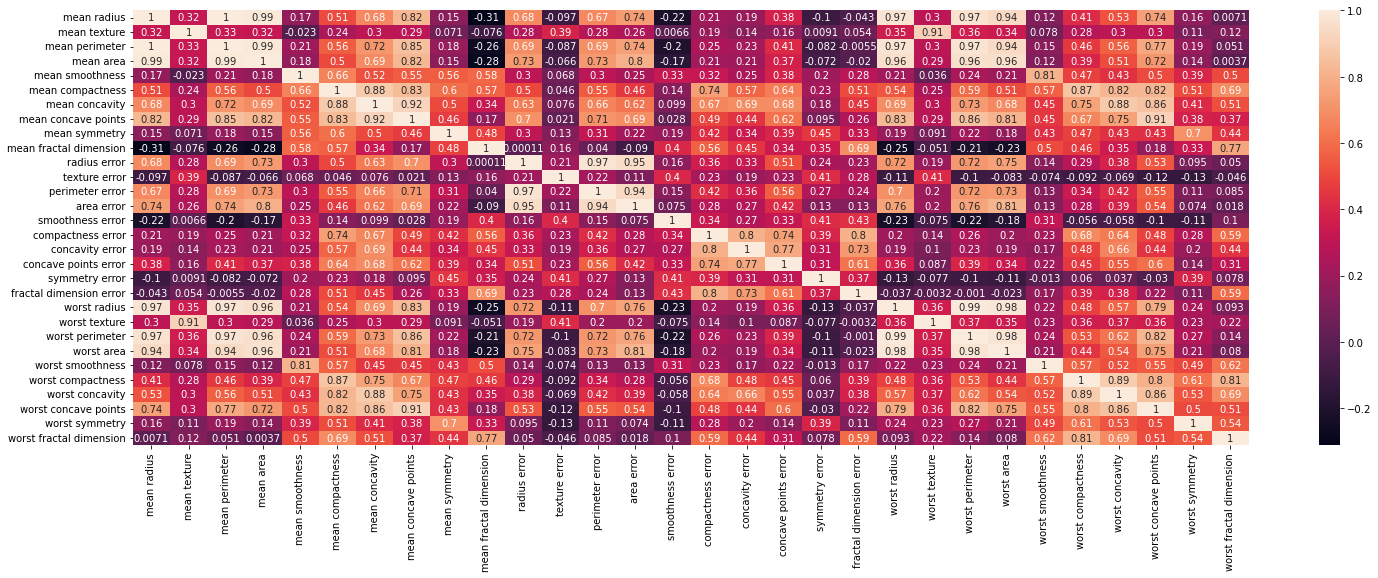

In [15]:
plt.figure(figsize = (25,8))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

#### Removing Multi collinearity

In [16]:
features_to_be_removed = ["mean area","mean perimeter","worst radius","worst perimeter","worst area","perimeter error","area error","worst concave points","worst texture"]

In [17]:
dataset_2 = dataset.drop(features_to_be_removed,axis = 1)

In [18]:
features = []
for i in dataset.columns:
    if not i in features_to_be_removed:
        features.append(i)

In [19]:
features

['mean radius',
 'mean texture',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst symmetry',
 'worst fractal dimension']

In [20]:
dataset_2 = pd.DataFrame(dataset_2,columns = features)

In [21]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
dataset_2.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


mean radius


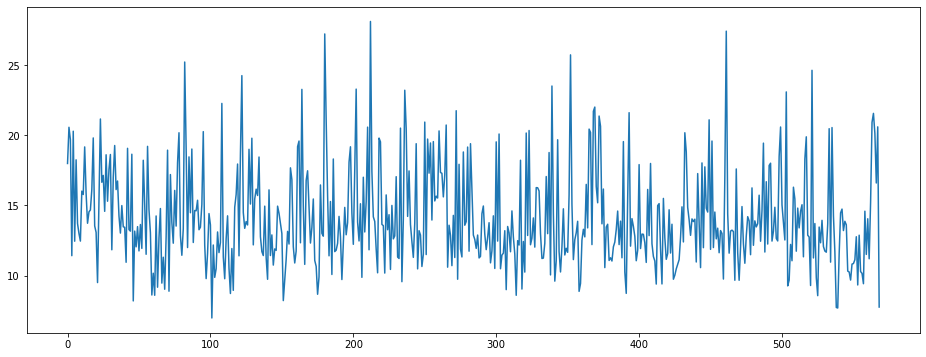

mean texture


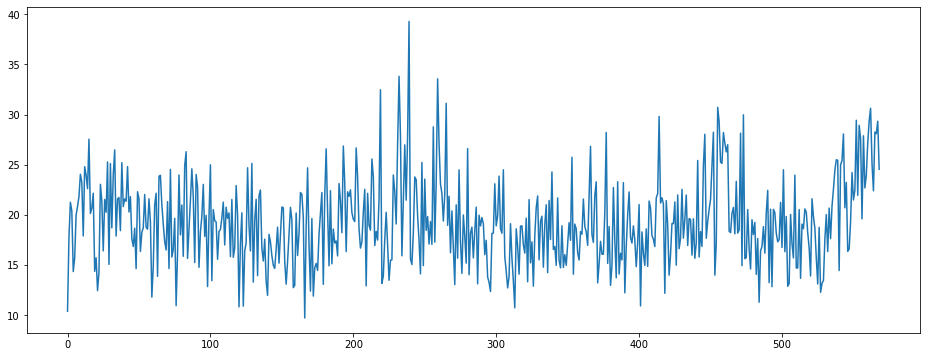

mean smoothness


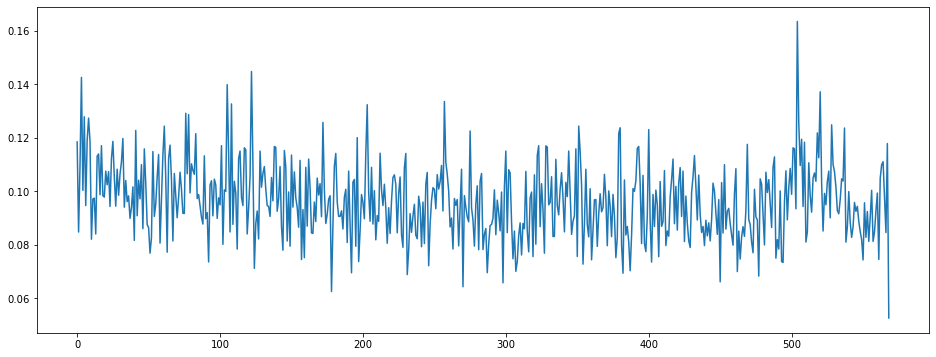

mean compactness


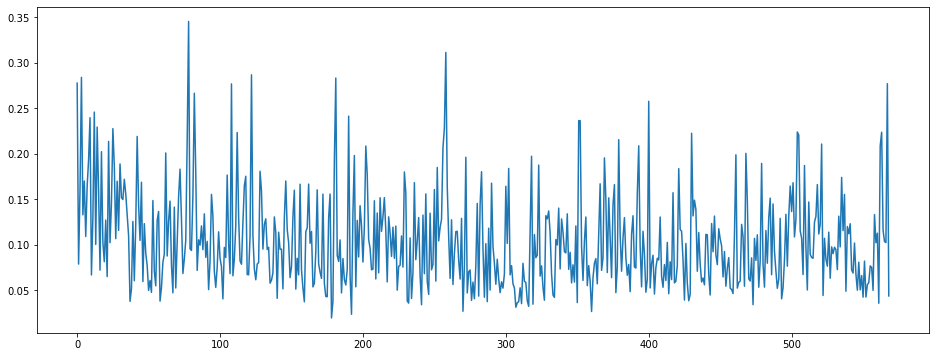

mean concavity


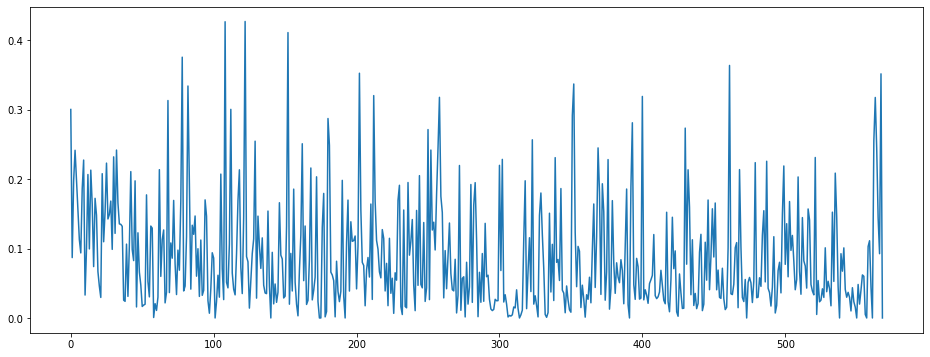

mean concave points


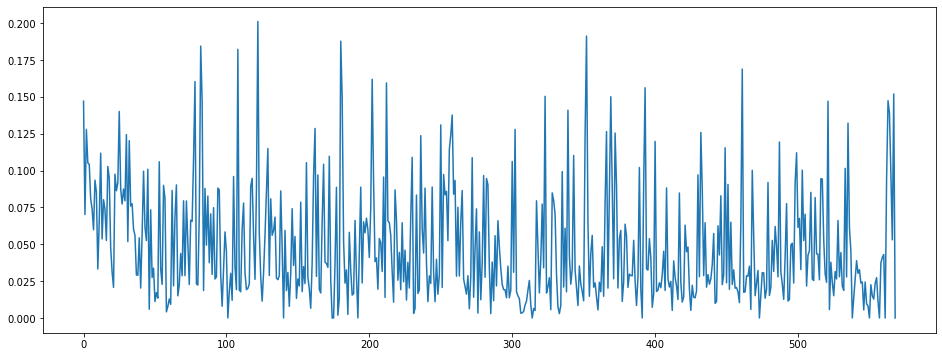

mean symmetry


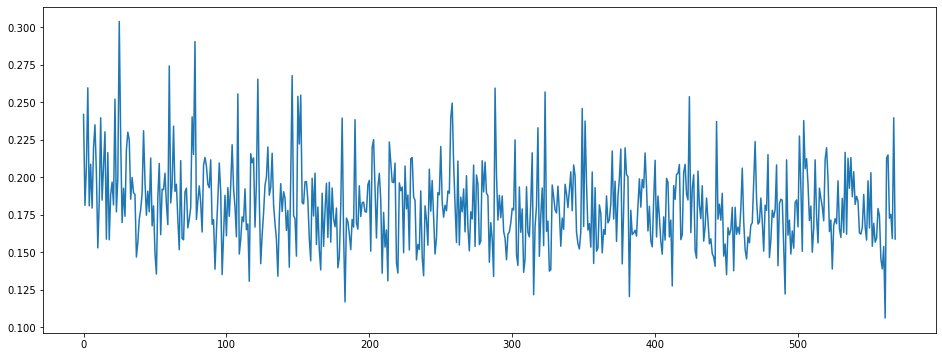

mean fractal dimension


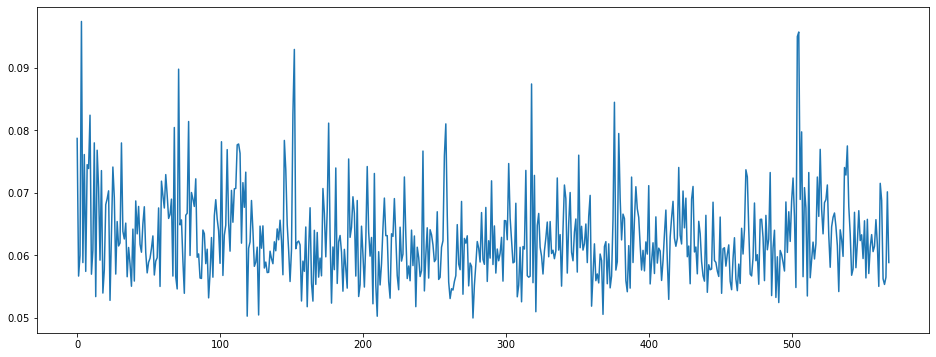

radius error


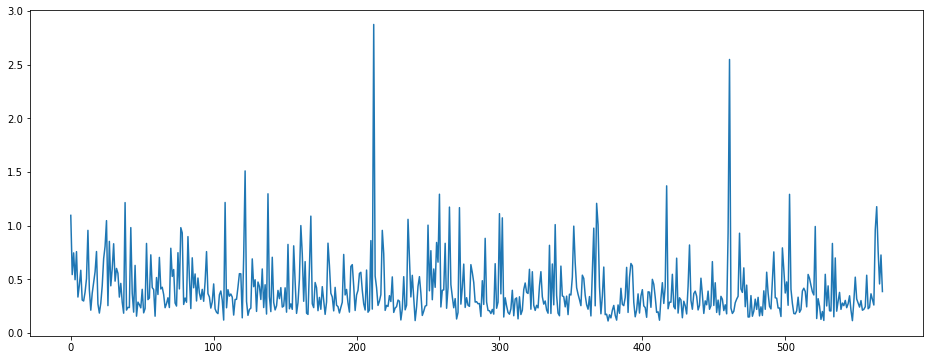

texture error


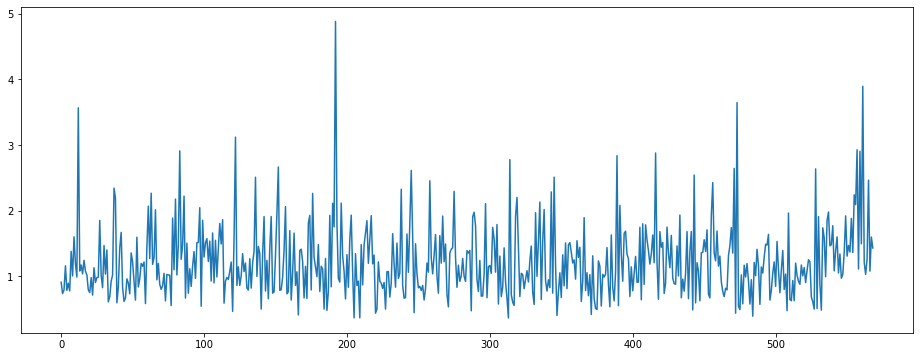

smoothness error


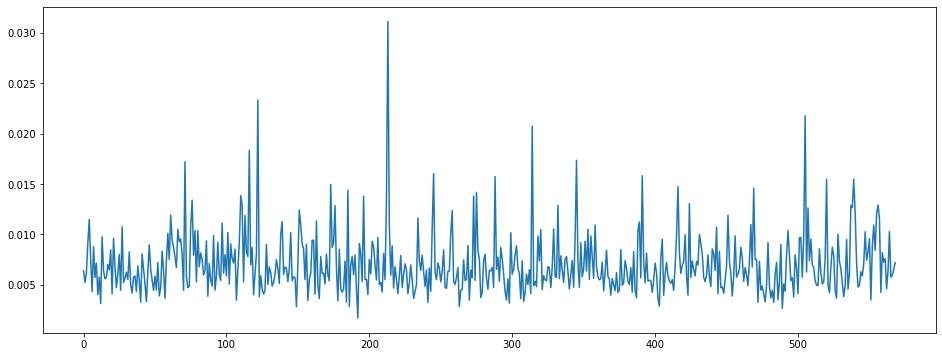

compactness error


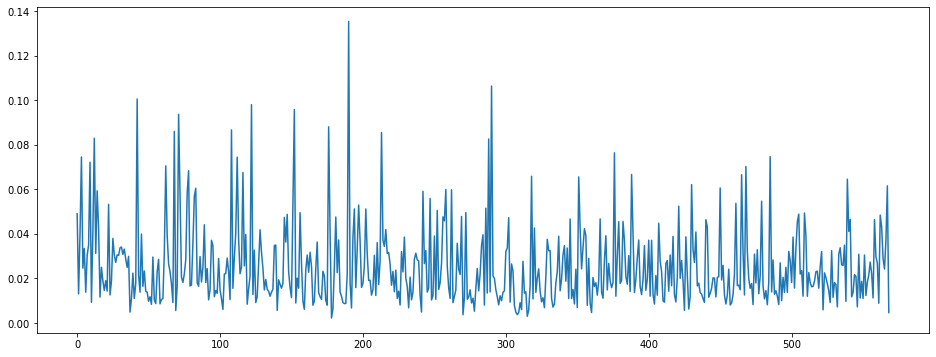

concavity error


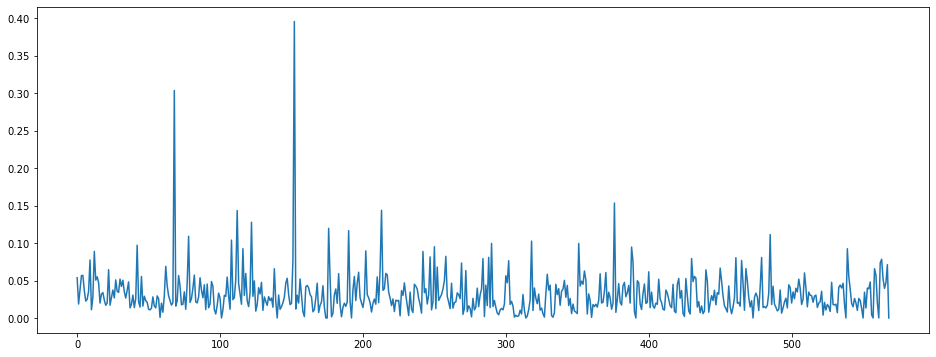

concave points error


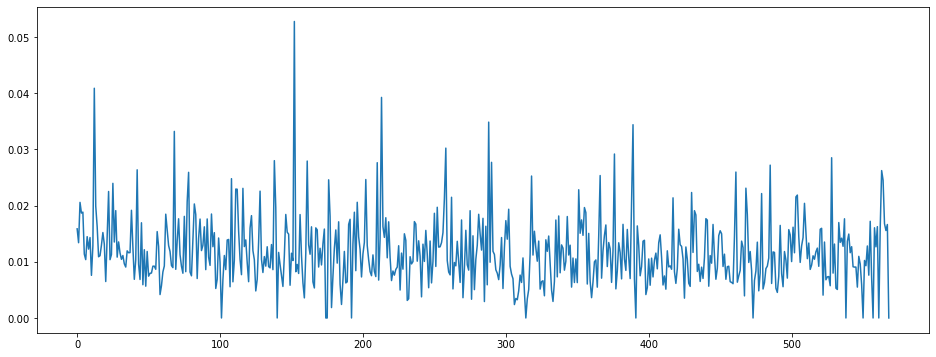

symmetry error


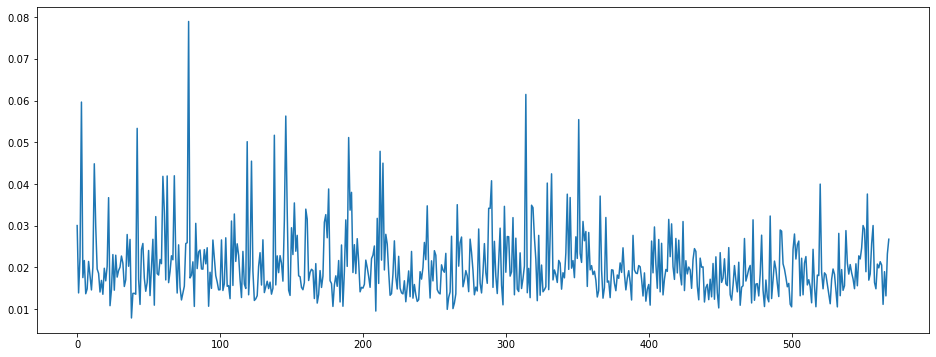

fractal dimension error


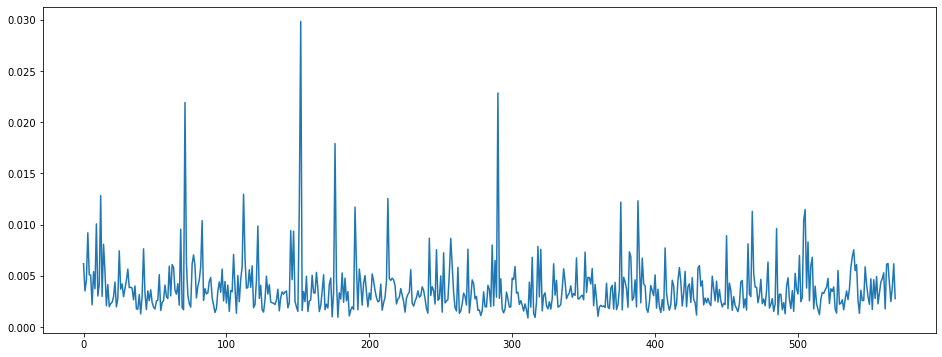

worst smoothness


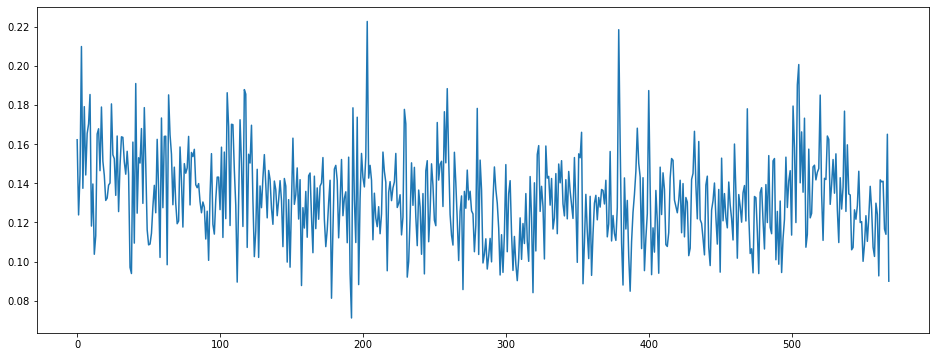

worst compactness


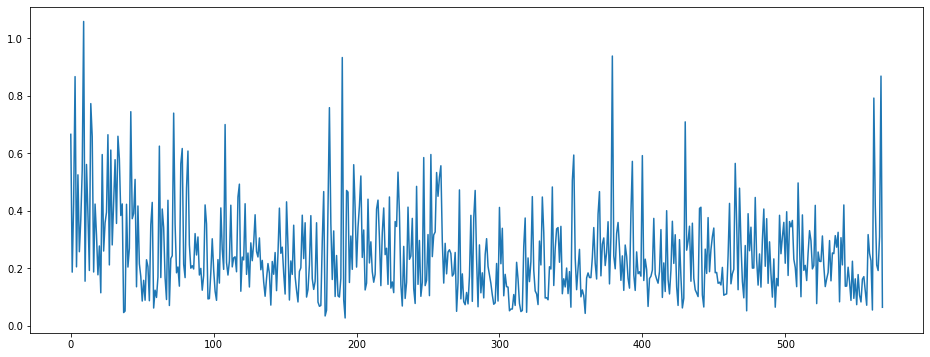

worst concavity


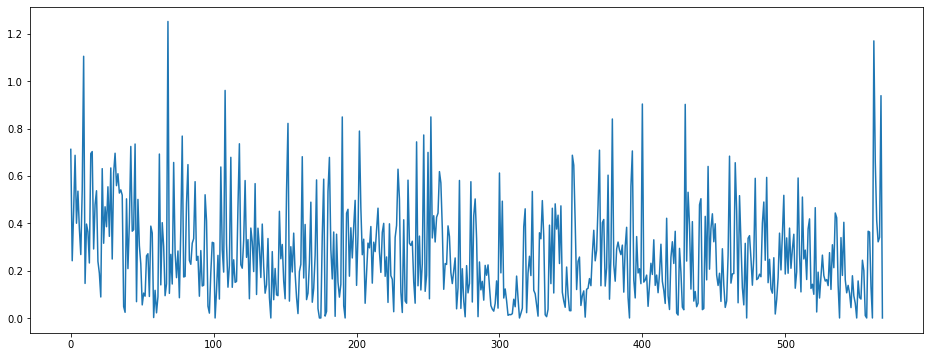

worst symmetry


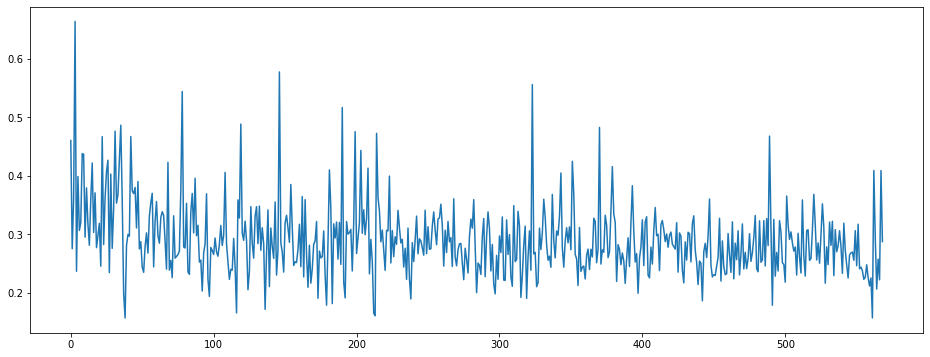

worst fractal dimension


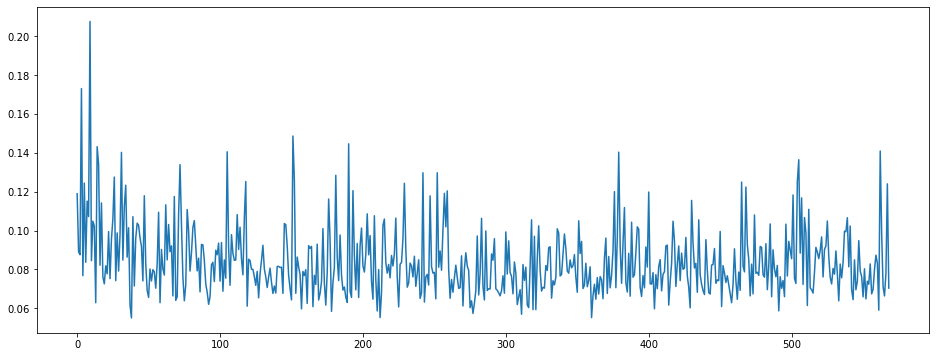

In [23]:
for i in dataset_2.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.plot(dataset_2[i])
    plt.show()

mean radius


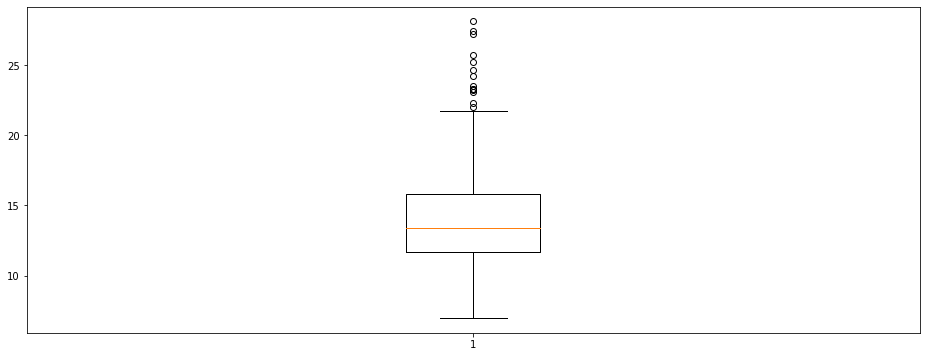

mean texture


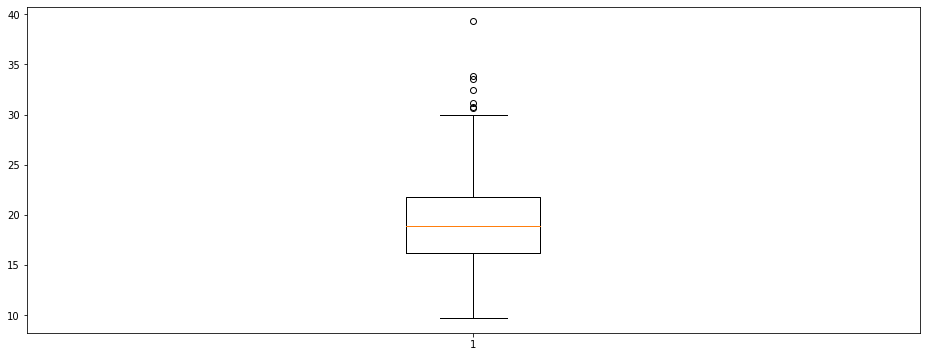

mean smoothness


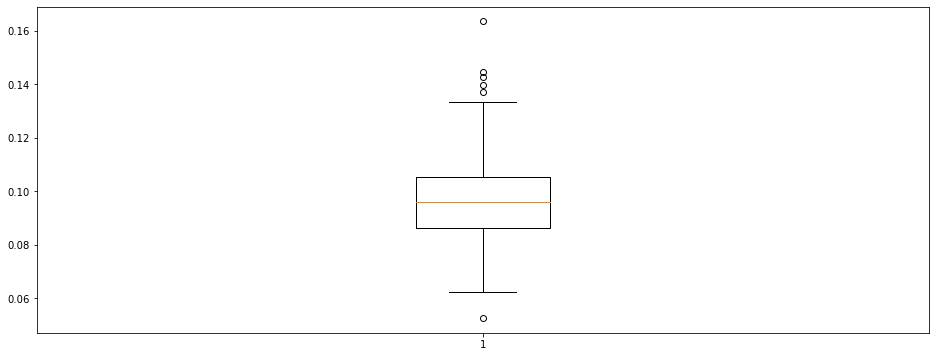

mean compactness


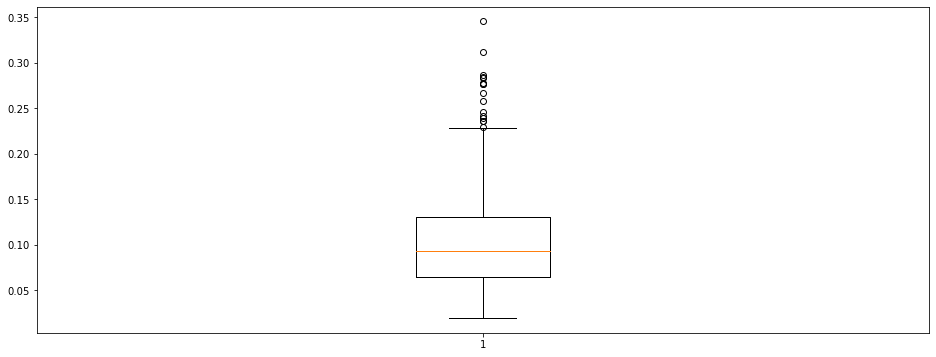

mean concavity


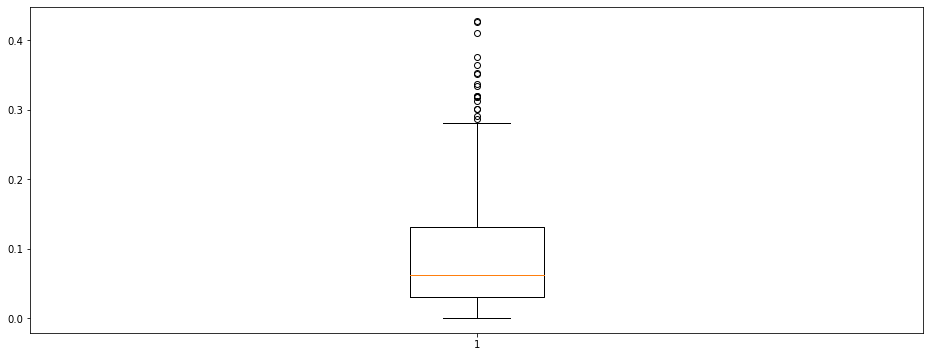

mean concave points


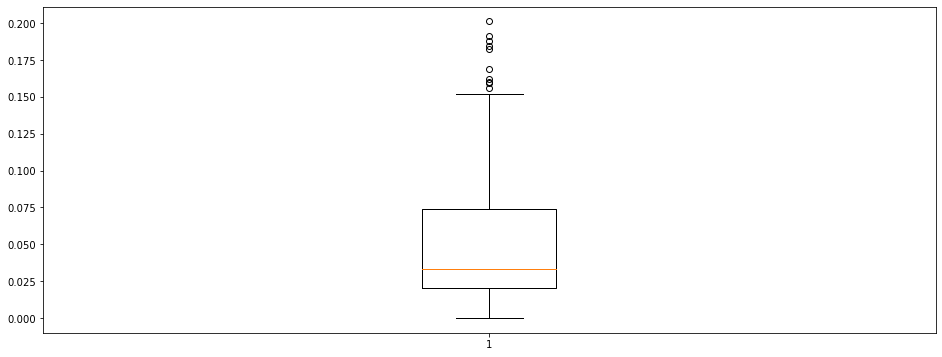

mean symmetry


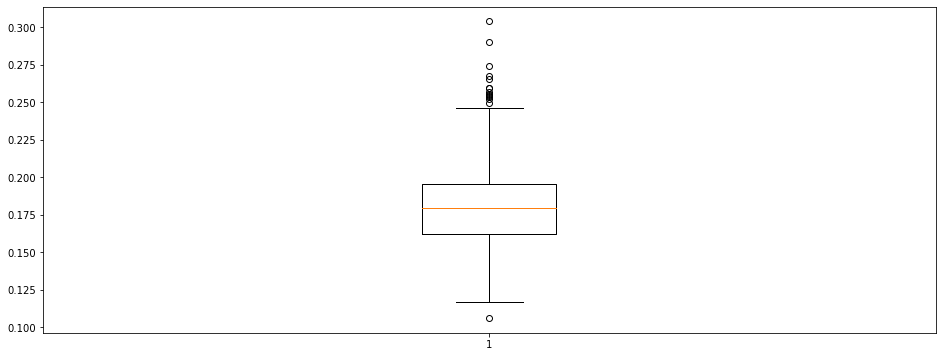

mean fractal dimension


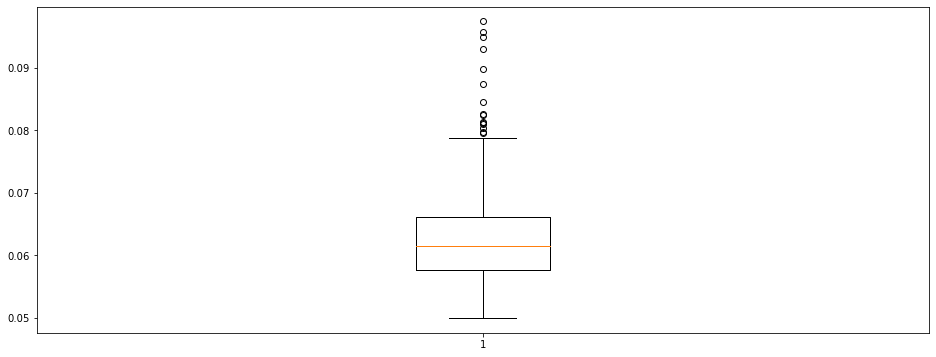

radius error


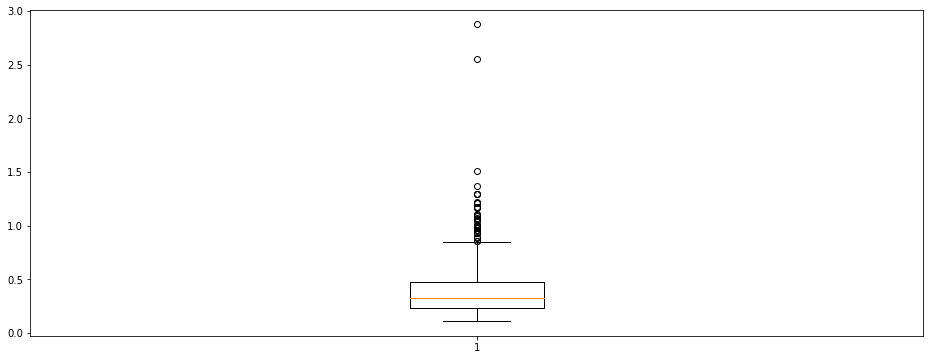

texture error


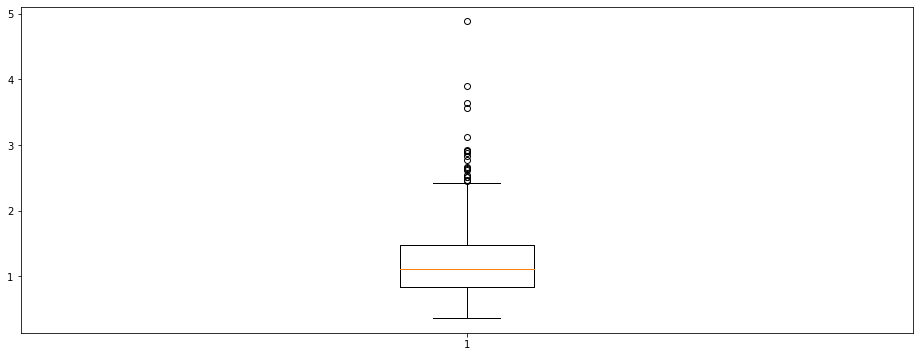

smoothness error


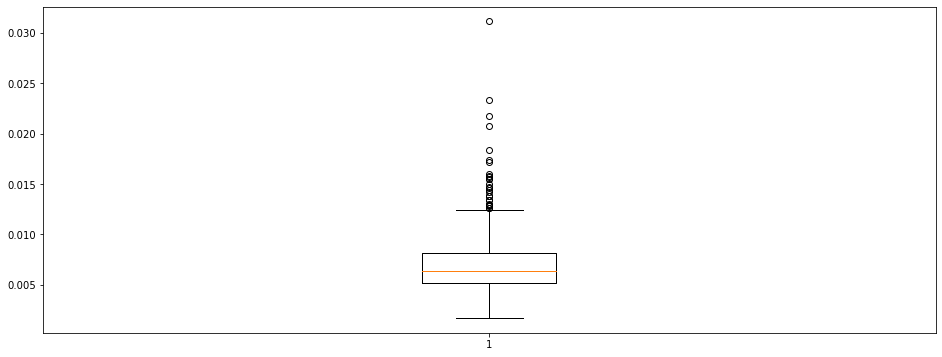

compactness error


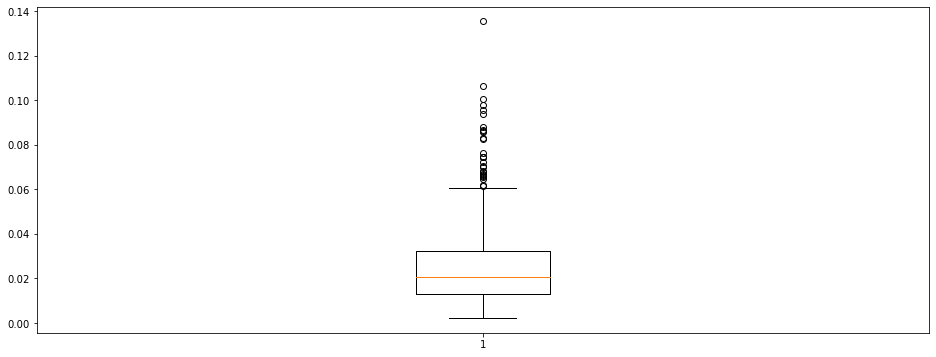

concavity error


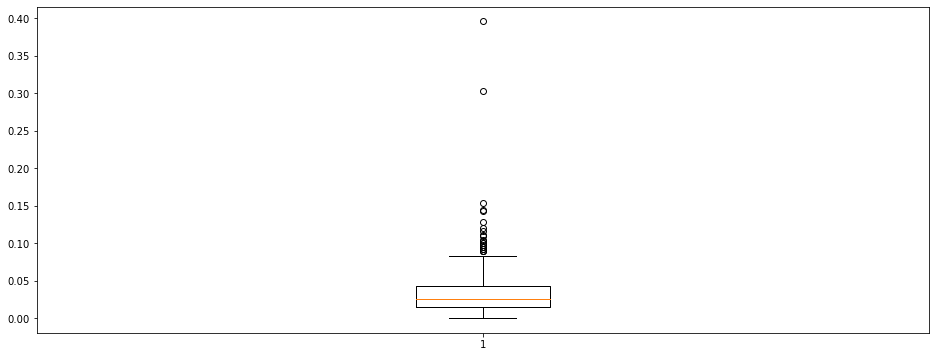

concave points error


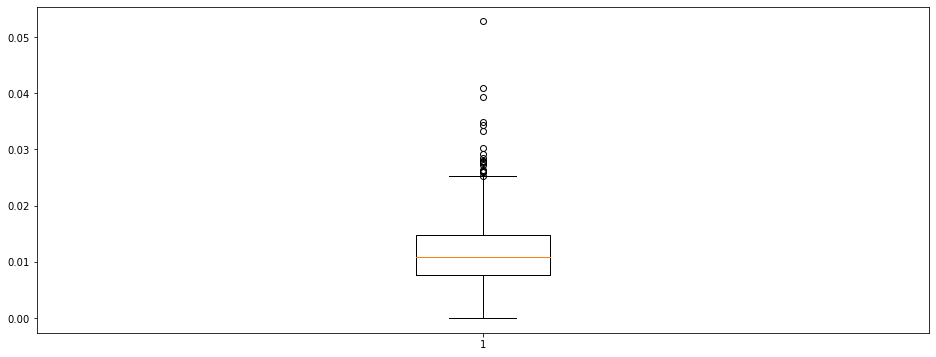

symmetry error


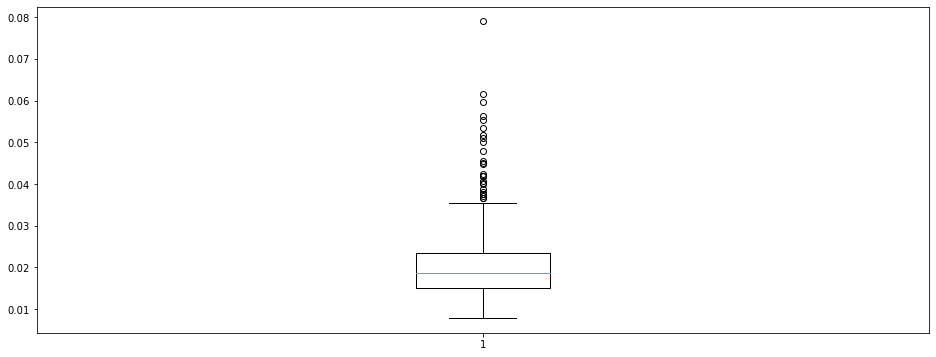

fractal dimension error


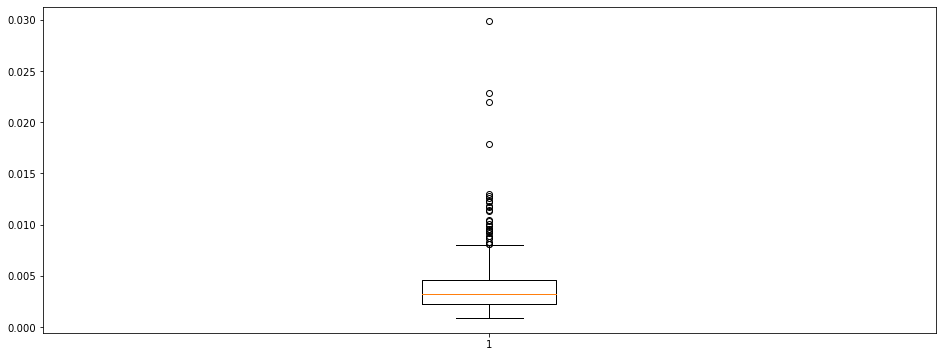

worst smoothness


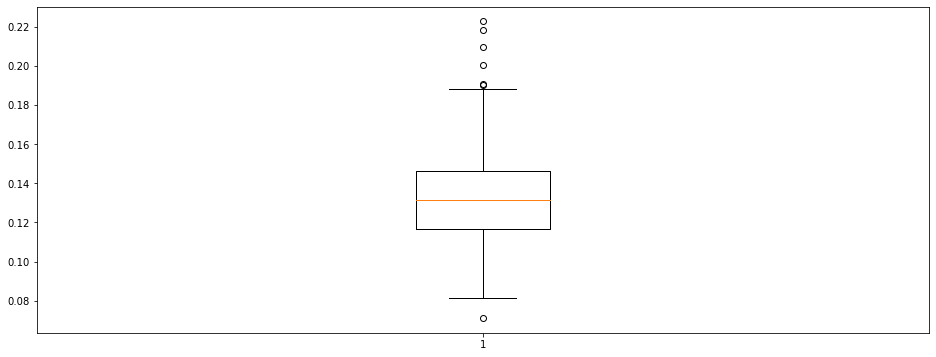

worst compactness


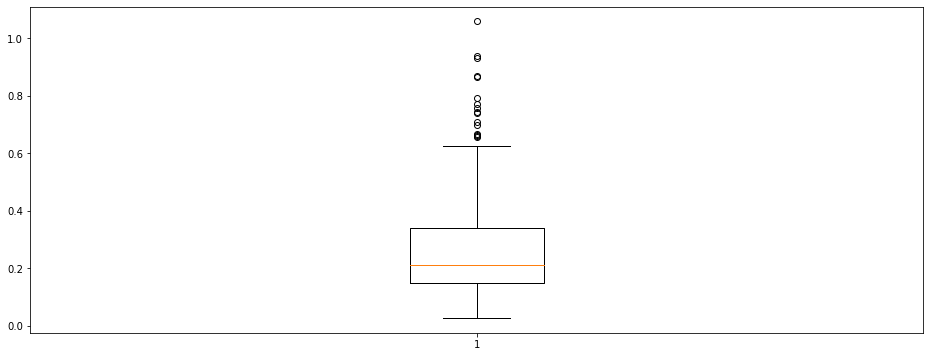

worst concavity


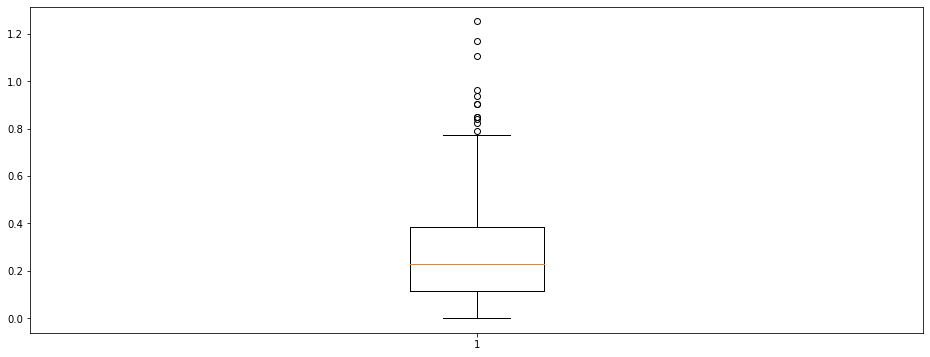

worst symmetry


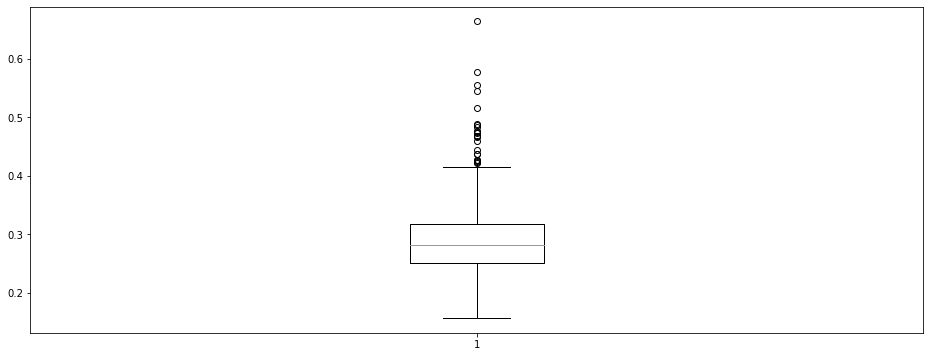

worst fractal dimension


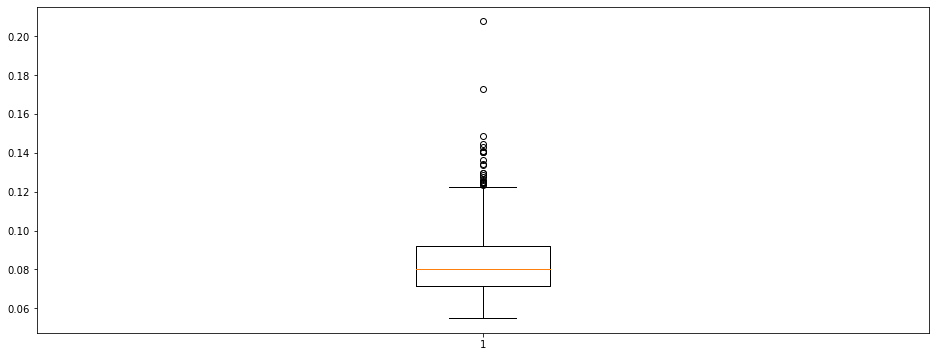

In [24]:
for i in dataset_2.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.boxplot(dataset_2[i])
    plt.show()

In [25]:
dataset_3 = dataset_2.copy()

In [26]:
dataset_3.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [27]:
for i in dataset_3.columns:    
    q1 = dataset_3[i].quantile(0.25)
    q3 = dataset_3[i].quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    dataset_3[i] = dataset_3[i].clip(lower = lc,upper = uc)

mean radius


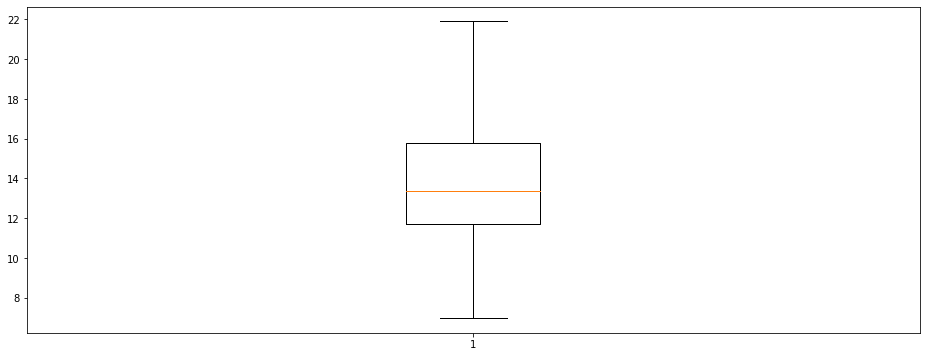

mean texture


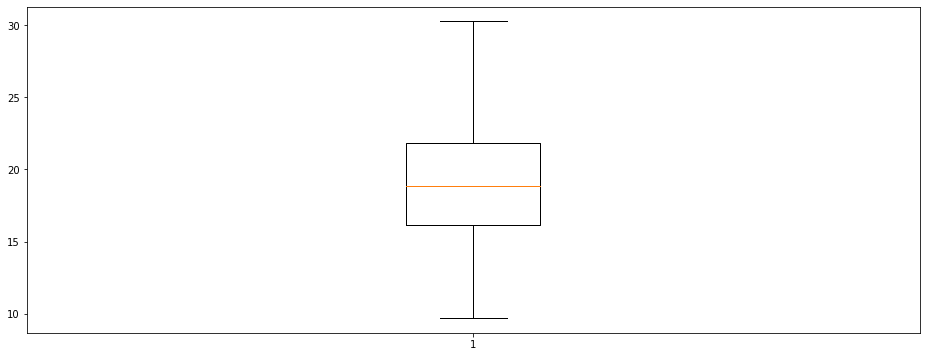

mean smoothness


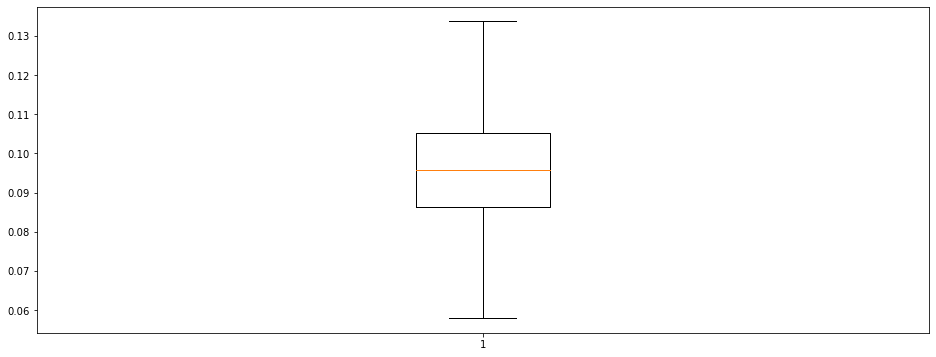

mean compactness


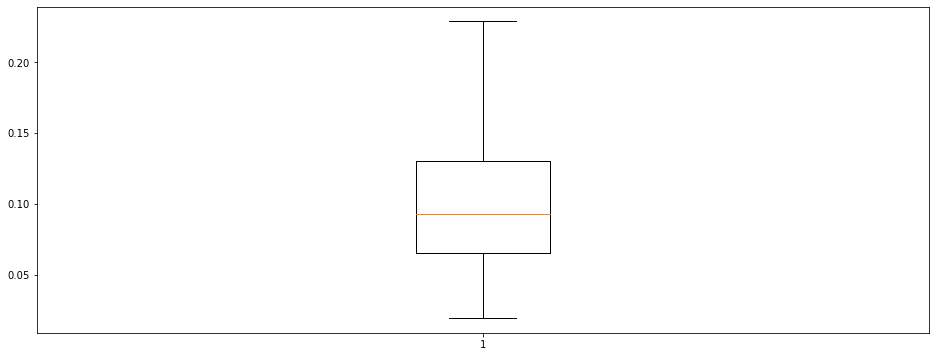

mean concavity


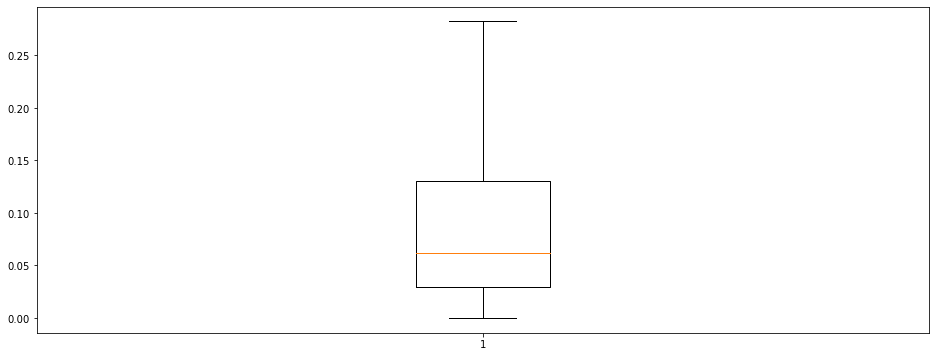

mean concave points


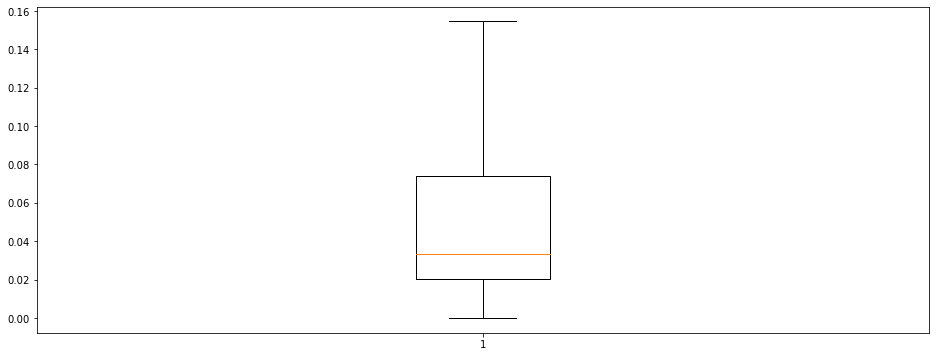

mean symmetry


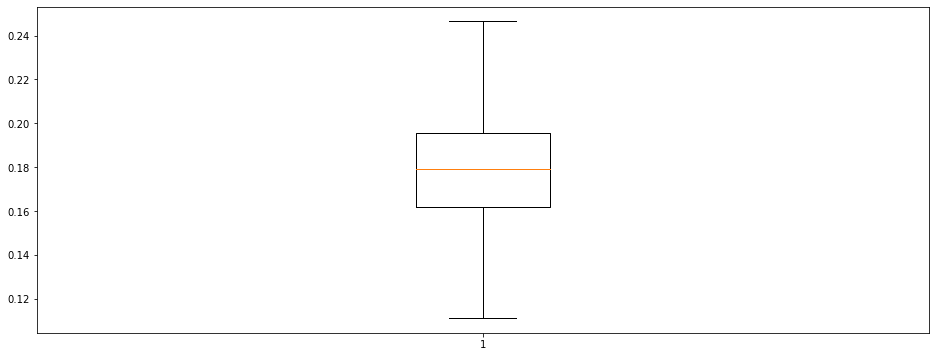

mean fractal dimension


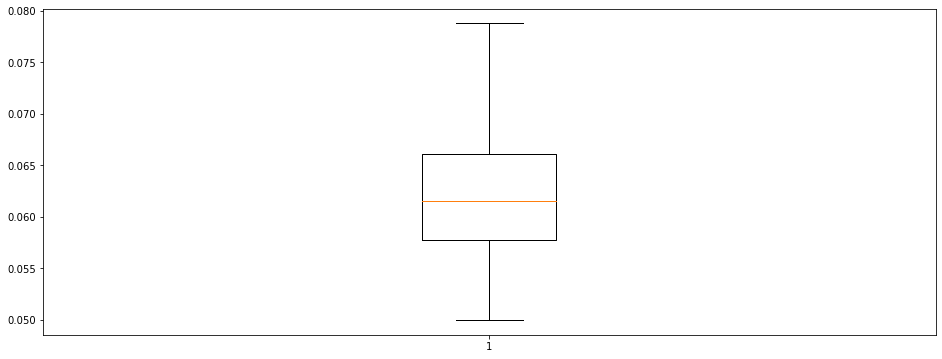

radius error


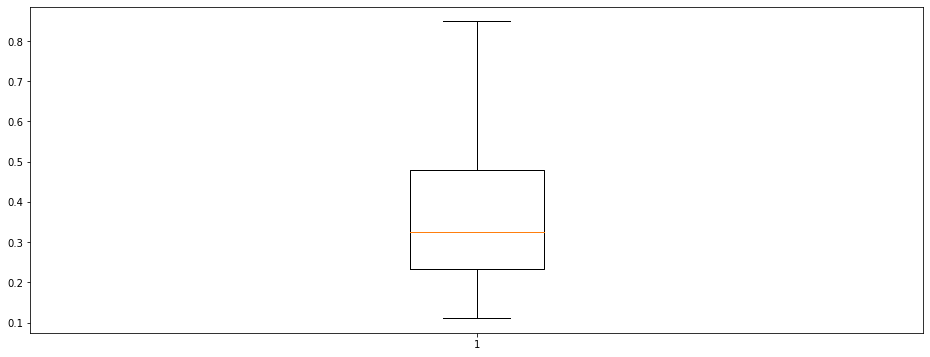

texture error


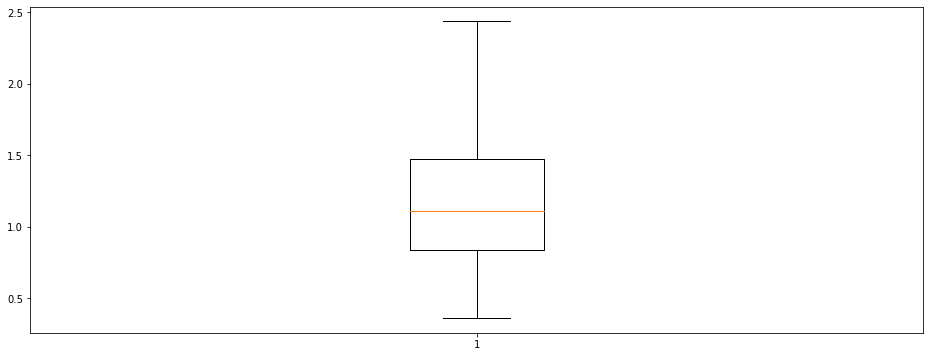

smoothness error


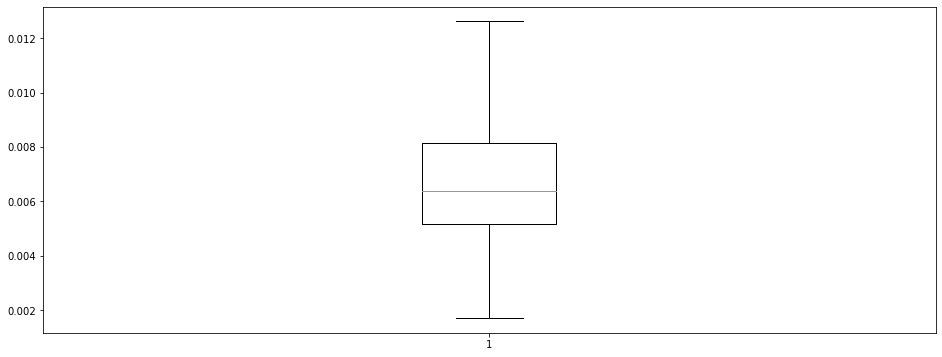

compactness error


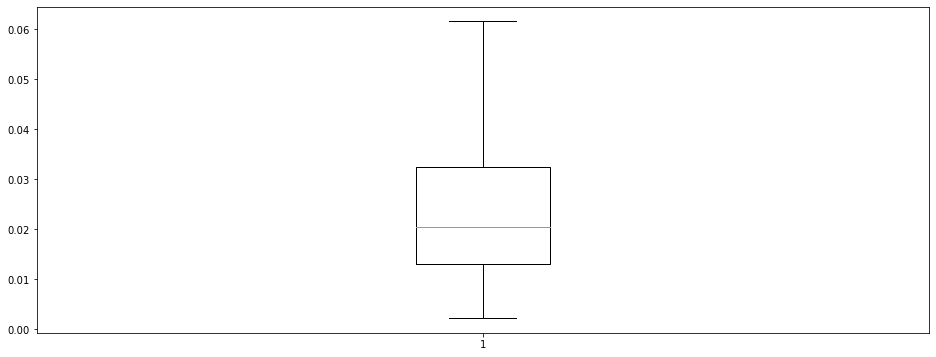

concavity error


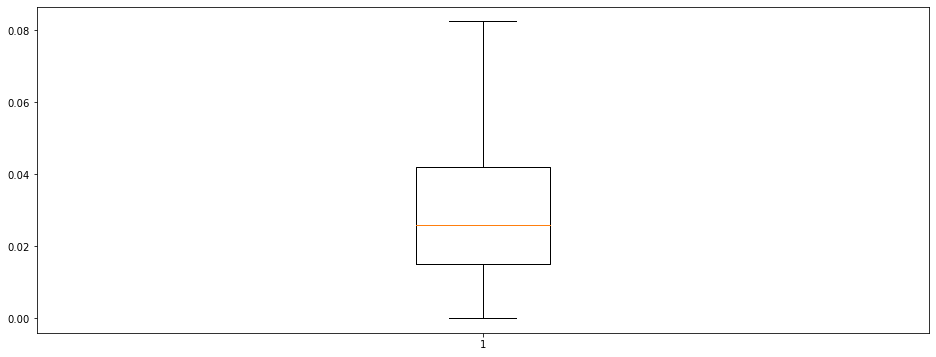

concave points error


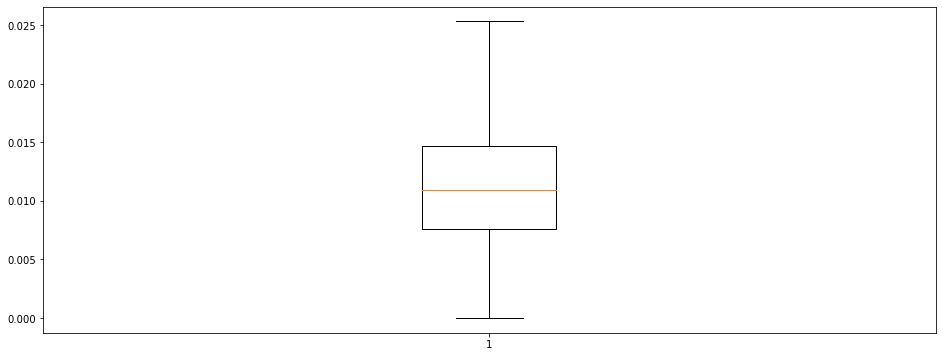

symmetry error


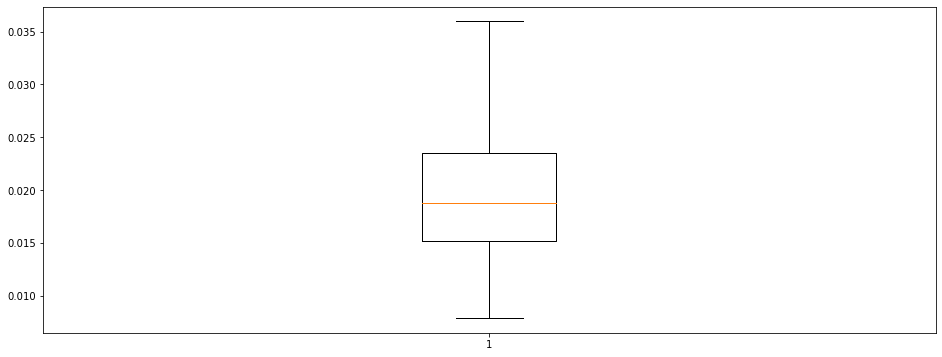

fractal dimension error


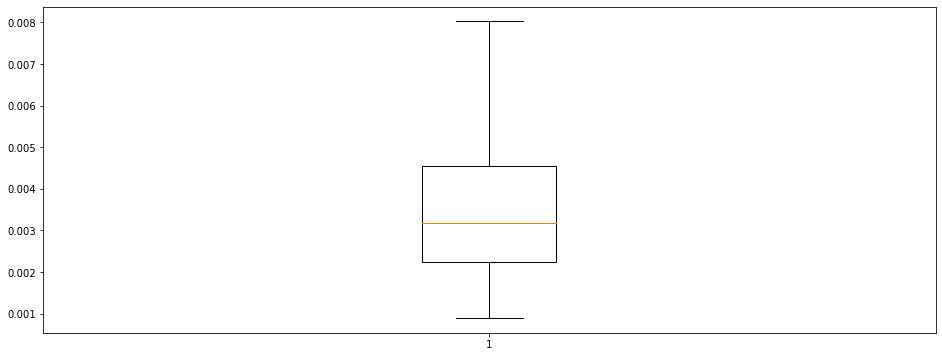

worst smoothness


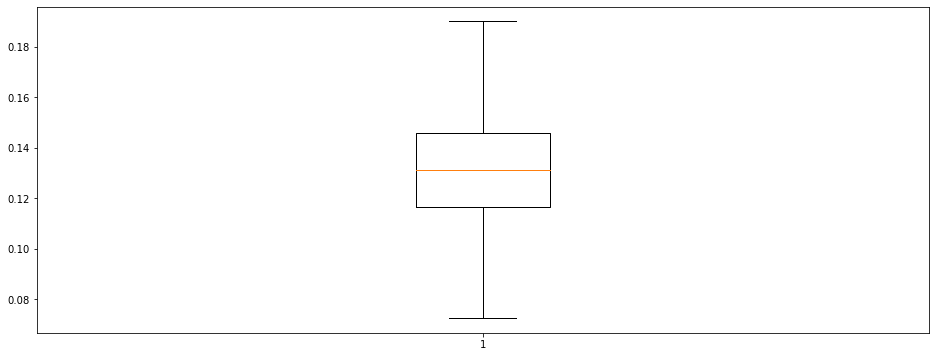

worst compactness


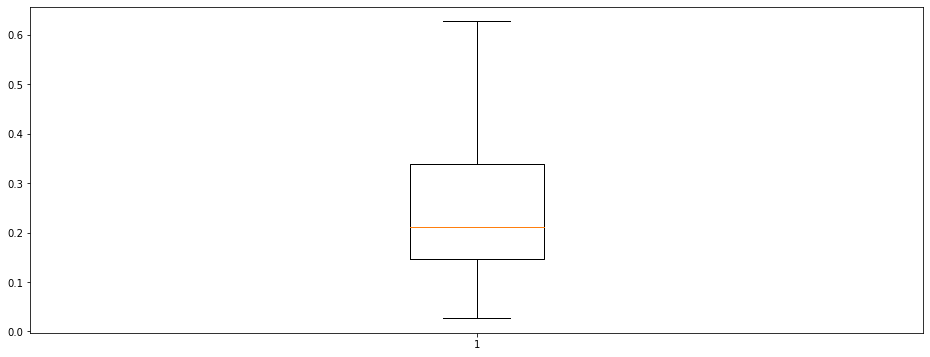

worst concavity


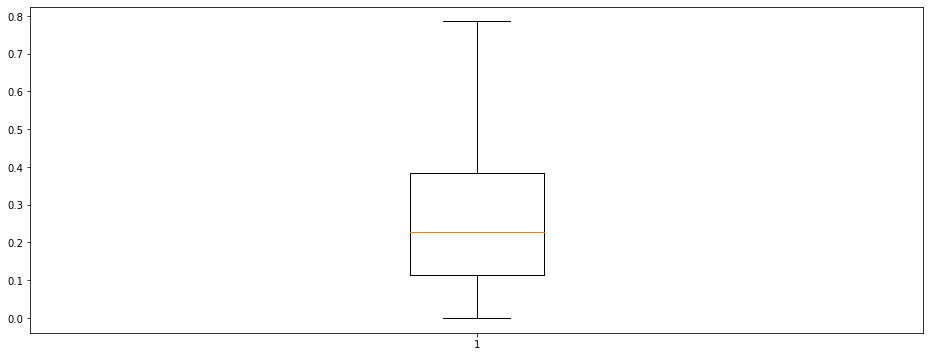

worst symmetry


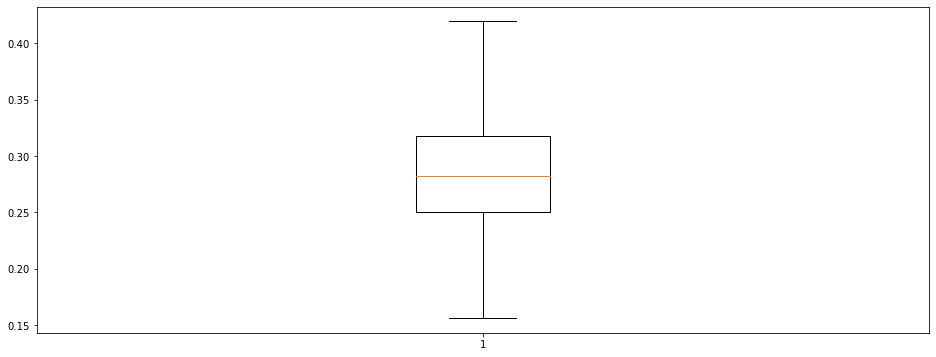

worst fractal dimension


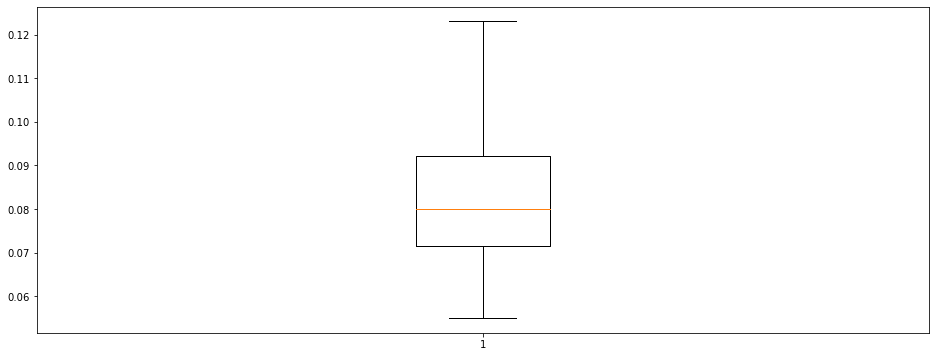

In [28]:
for i in dataset_3.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.boxplot(dataset_3[i])
    plt.show()

mean radius


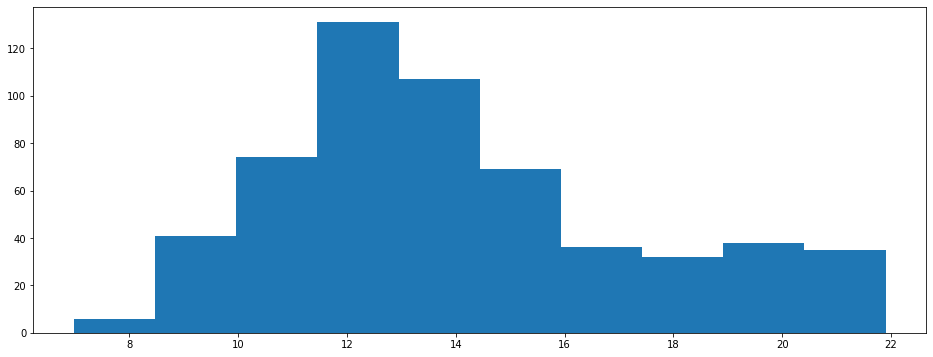

mean texture


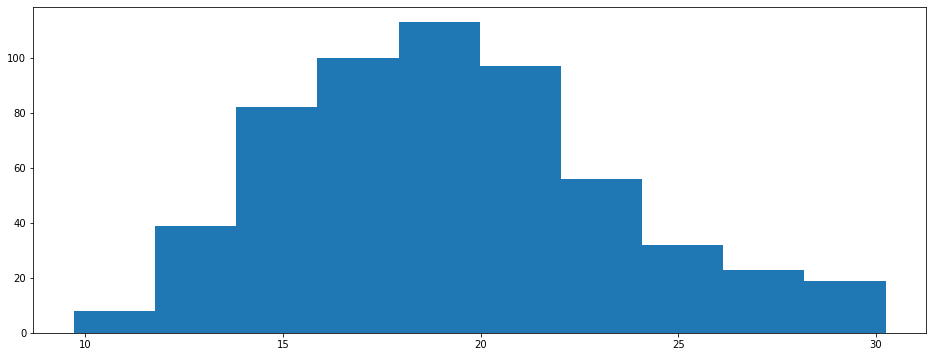

mean smoothness


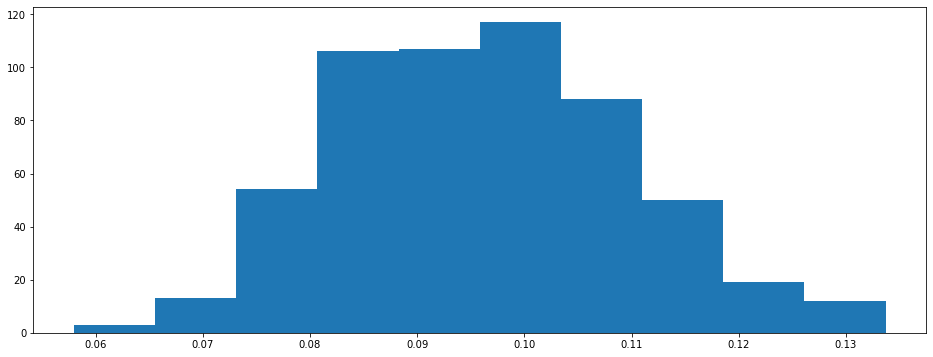

mean compactness


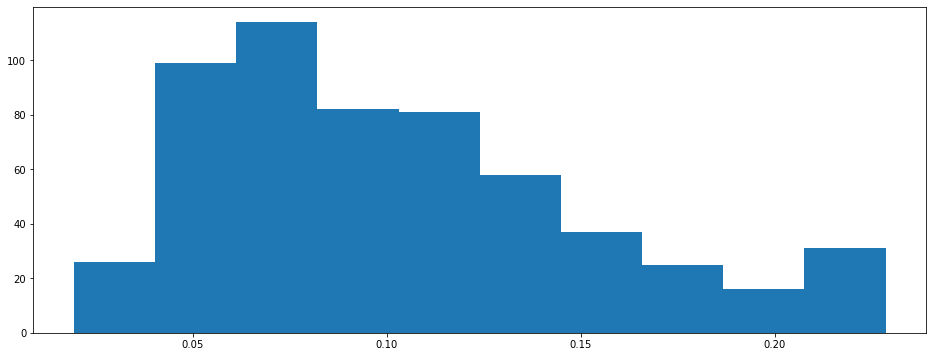

mean concavity


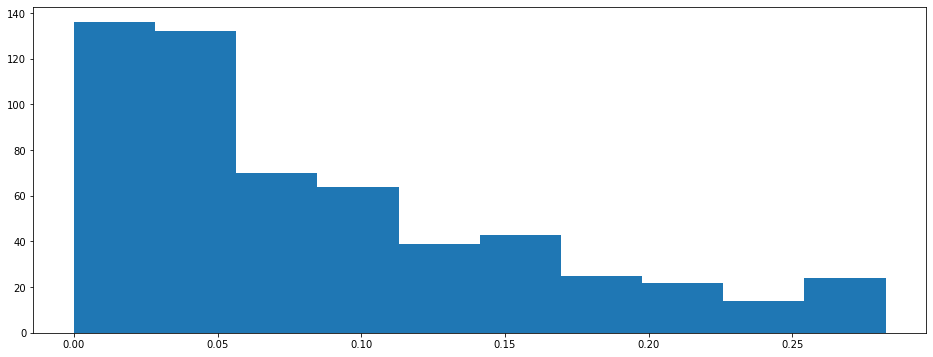

mean concave points


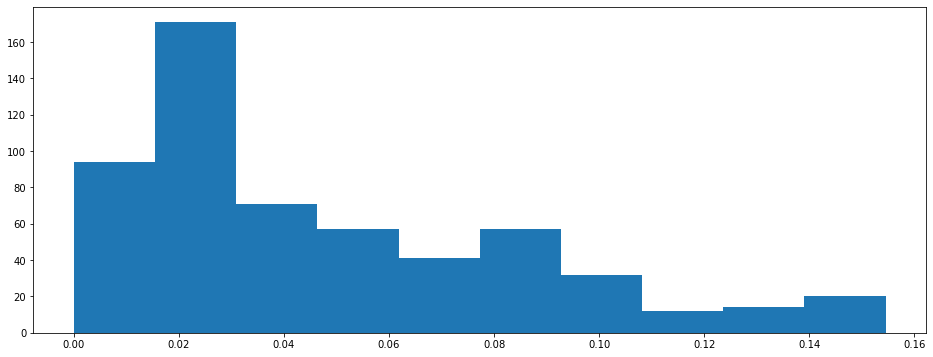

mean symmetry


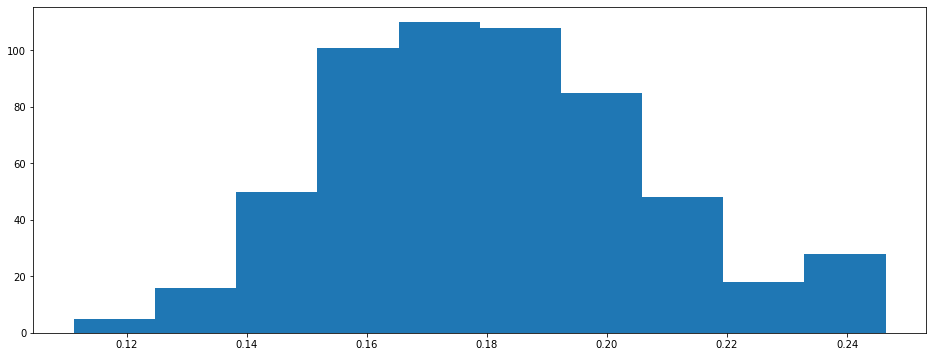

mean fractal dimension


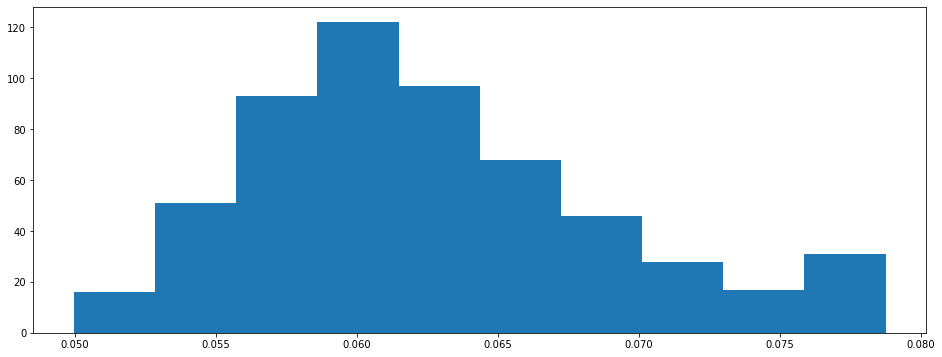

radius error


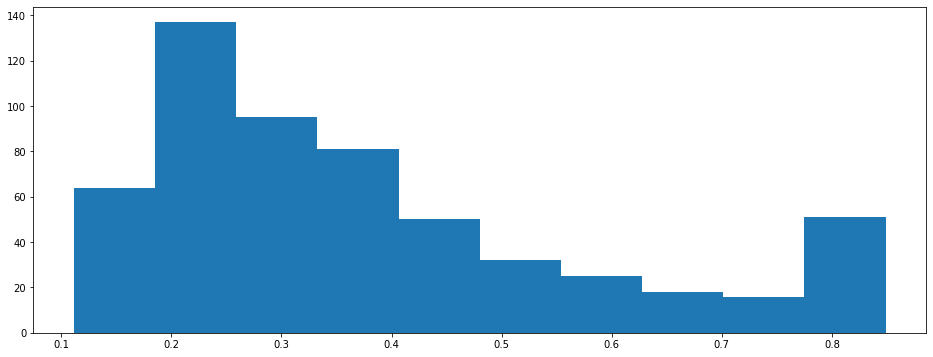

texture error


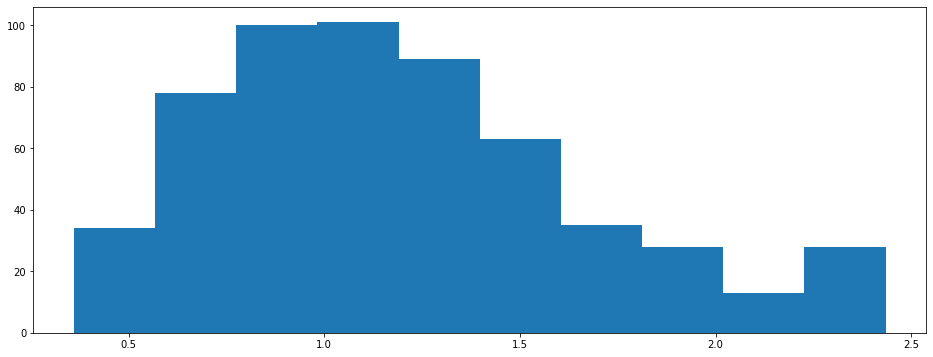

smoothness error


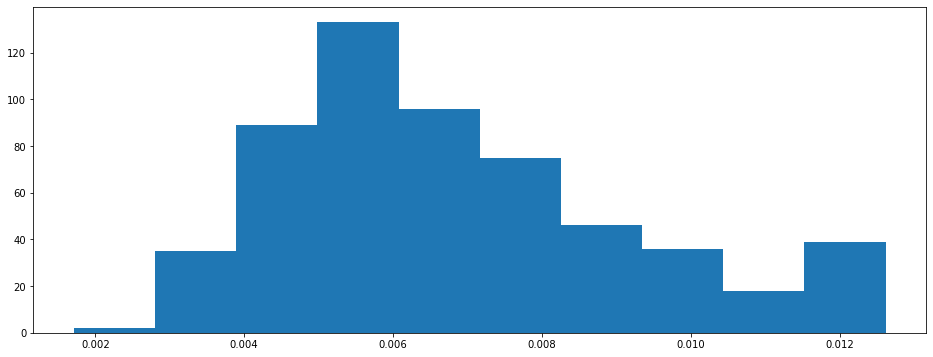

compactness error


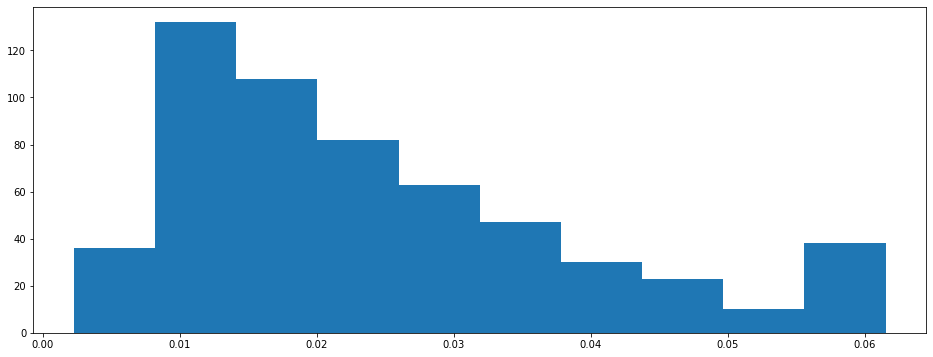

concavity error


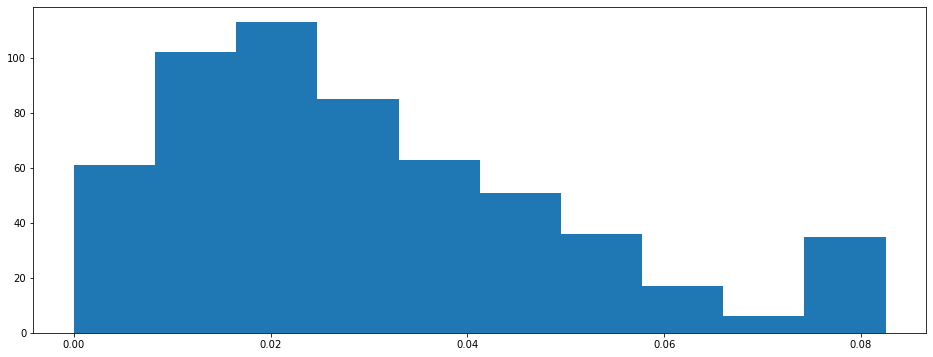

concave points error


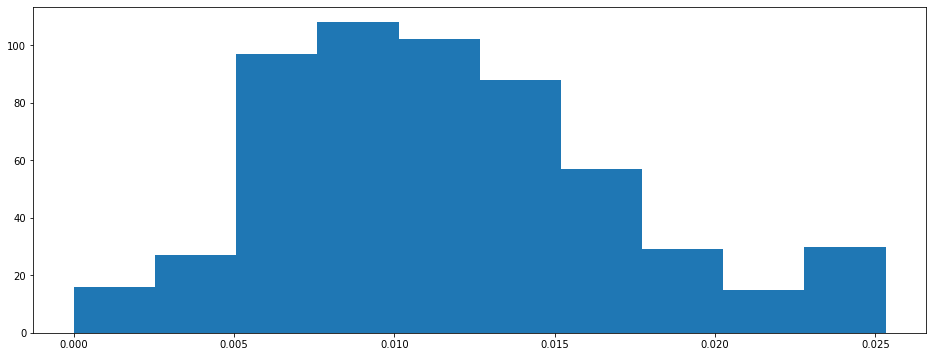

symmetry error


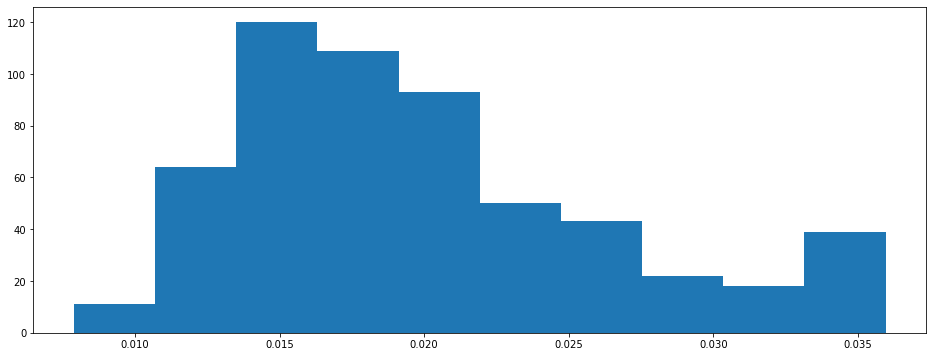

fractal dimension error


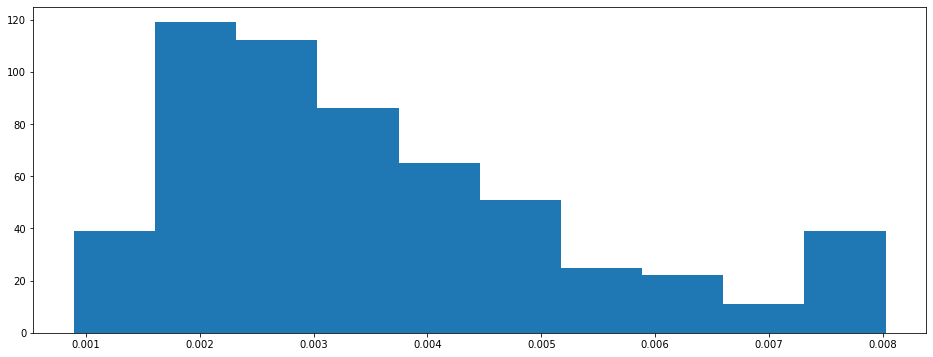

worst smoothness


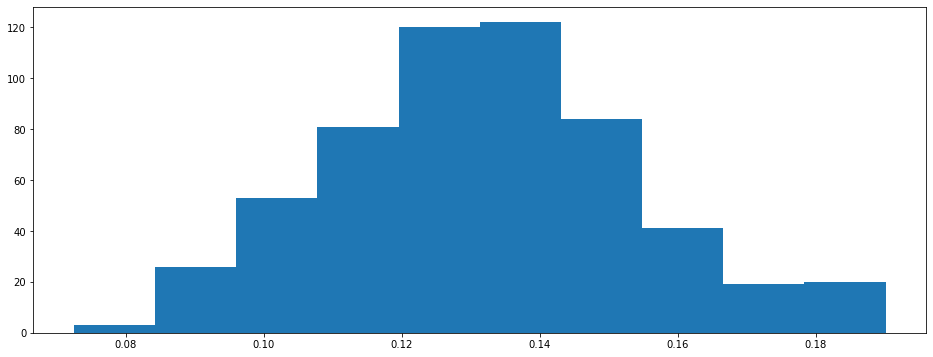

worst compactness


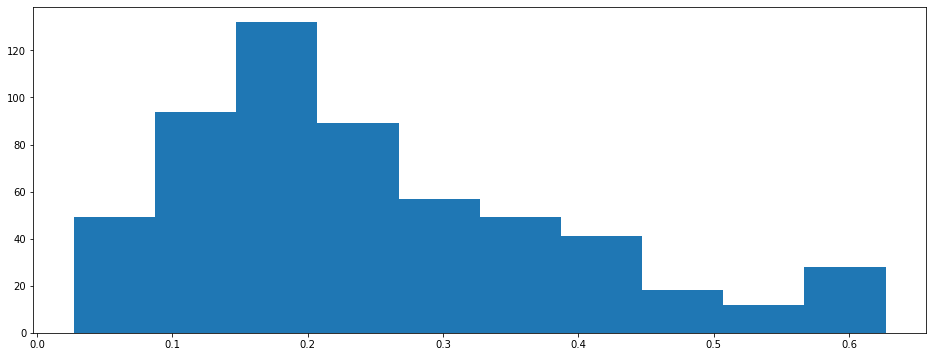

worst concavity


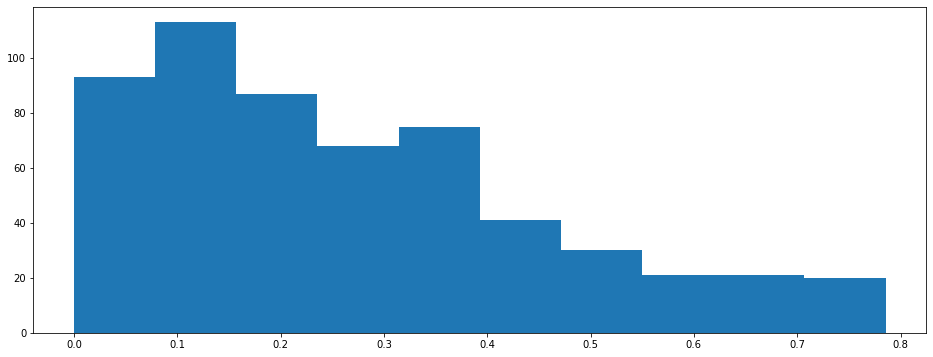

worst symmetry


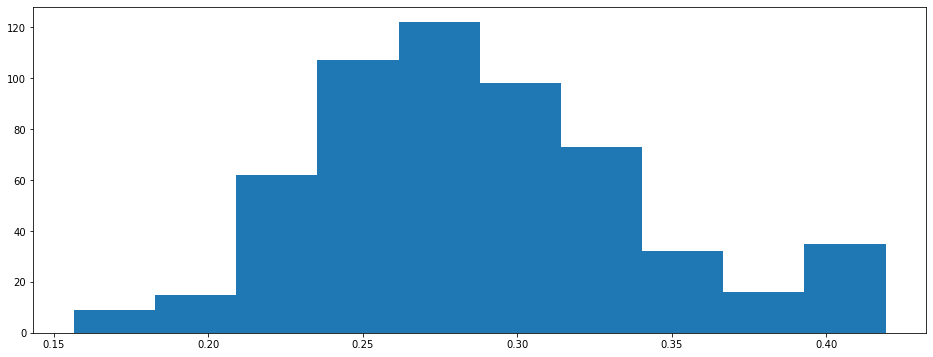

worst fractal dimension


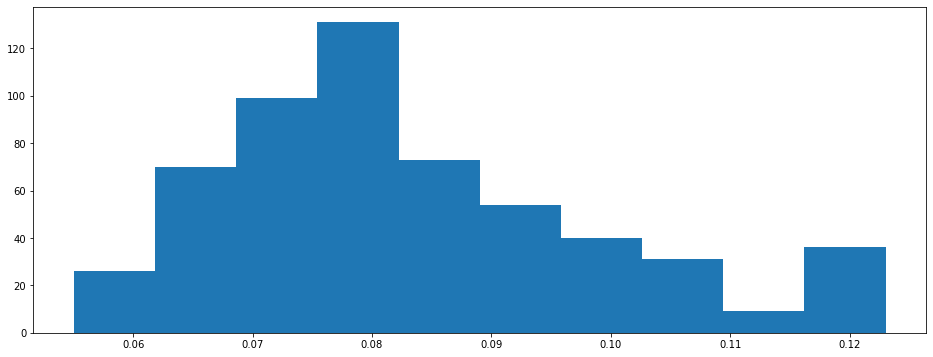

In [29]:
for i in dataset_3.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.hist(dataset_3[i])
    plt.show()

In [30]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
dataset_2.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [32]:
dataset_3.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,...,0.049040,0.05373,0.01587,0.03003,0.006193,0.1622,0.62695,0.7119,0.41915,0.11890
1,20.57,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,...,0.013080,0.01860,0.01340,0.01389,0.003532,0.1238,0.18660,0.2416,0.27500,0.08902
2,19.69,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,...,0.040060,0.03832,0.02058,0.02250,0.004571,0.1444,0.42450,0.4504,0.36130,0.08758
3,11.42,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,...,0.061505,0.05661,0.01867,0.03596,0.008023,0.1901,0.62695,0.6869,0.41915,0.12301
4,20.29,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,...,0.024610,0.05688,0.01885,0.01756,0.005115,0.1374,0.20500,0.4000,0.23640,0.07678


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
dataset_scaled = dataset.copy()
dataset_scaled_2 = dataset_2.copy()
dataset_scaled_3 = dataset_3.copy()

In [35]:
dataset_scaled = scaler.fit_transform(dataset_scaled)
dataset_scaled_2 = scaler.fit_transform(dataset_scaled_2)
dataset_scaled_3 = scaler.fit_transform(dataset_scaled_3)

In [36]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns = dataset.columns)
dataset_scaled_2 = pd.DataFrame(dataset_scaled_2,columns = dataset_2.columns)
dataset_scaled_3 = pd.DataFrame(dataset_scaled_3,columns = dataset_3.columns)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
X = dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
print(y.shape)
y.head()

(569, 1)


,0
0,0
1,0
2,0
3,0
4,0


In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 32)

In [41]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       168
           1       0.96      0.97      0.96       287

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

accuracy score 0.9538461538461539
confusion matrix
[[156  12]
 [  9 278]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.92      0.93      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

accuracy score 0.9035087719298246
confusion matrix
[[38  6]
 [ 5 65]]


In [42]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       168
           1       0.92      0.98      0.95       287

    accuracy                           0.93       455
   macro avg       0.94      0.92      0.93       455
weighted avg       0.94      0.93      0.93       455

accuracy score 0.9340659340659341
confusion matrix
[[143  25]
 [  5 282]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.85      0.96      0.90        70

    accuracy                           0.87       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.87      0.86       114

accuracy score 0.868421052631579
confusion matrix
[[32 12]
 [ 3 67]]


In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       287

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[168   0]
 [  0 287]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.92      0.93      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

accuracy score 0.9035087719298246
confusion matrix
[[38  6]
 [ 5 65]]


In [44]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       287

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[168   0]
 [  0 287]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.96      0.96      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy score 0.9473684210526315
confusion matrix
[[41  3]
 [ 3 67]]


In [45]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       168
           1       0.94      0.98      0.96       287

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455

accuracy score 0.9472527472527472
confusion matrix
[[151  17]
 [  7 280]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.92      0.94      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

accuracy score 0.9122807017543859
confusion matrix
[[38  6]
 [ 4 66]]


In [46]:
X = dataset_2
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [48]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       174
           1       0.93      0.96      0.95       281

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

accuracy score 0.9318681318681319
confusion matrix
[[155  19]
 [ 12 269]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.93      0.97      0.95        76

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[32  6]
 [ 2 74]]


In [49]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       174
           1       0.88      0.97      0.93       281

    accuracy                           0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.91      0.90      0.90       455

accuracy score 0.9032967032967033
confusion matrix
[[138  36]
 [  8 273]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        38
           1       0.89      0.97      0.93        76

    accuracy                           0.90       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

accuracy score 0.9035087719298246
confusion matrix
[[29  9]
 [ 2 74]]


In [50]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.96      0.95      0.95        76

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

accuracy score 0.9385964912280702
confusion matrix
[[35  3]
 [ 4 72]]


In [51]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.99      0.96      0.97        76

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

accuracy score 0.9649122807017544
confusion matrix
[[37  1]
 [ 3 73]]


In [52]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       174
           1       0.91      0.93      0.92       281

    accuracy                           0.90       455
   macro avg       0.90      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455

accuracy score 0.9010989010989011
confusion matrix
[[149  25]
 [ 20 261]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.96      0.93      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[35  3]
 [ 5 71]]


In [53]:
X = dataset_3
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,17.99,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,...,0.049040,0.05373,0.01587,0.03003,0.006193,0.1622,0.62695,0.7119,0.41915,0.11890
1,20.57,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,...,0.013080,0.01860,0.01340,0.01389,0.003532,0.1238,0.18660,0.2416,0.27500,0.08902
2,19.69,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,...,0.040060,0.03832,0.02058,0.02250,0.004571,0.1444,0.42450,0.4504,0.36130,0.08758
3,11.42,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,...,0.061505,0.05661,0.01867,0.03596,0.008023,0.1901,0.62695,0.6869,0.41915,0.12301
4,20.29,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,...,0.024610,0.05688,0.01885,0.01756,0.005115,0.1374,0.20500,0.4000,0.23640,0.07678


In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [55]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       174
           1       0.93      0.96      0.95       281

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

accuracy score 0.9318681318681319
confusion matrix
[[154  20]
 [ 11 270]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.93      0.97      0.95        76

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[32  6]
 [ 2 74]]


In [56]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.94      0.78      0.86       174
           1       0.88      0.97      0.92       281

    accuracy                           0.90       455
   macro avg       0.91      0.88      0.89       455
weighted avg       0.90      0.90      0.90       455

accuracy score 0.8989010989010989
confusion matrix
[[136  38]
 [  8 273]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        38
           1       0.89      0.97      0.93        76

    accuracy                           0.90       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

accuracy score 0.9035087719298246
confusion matrix
[[29  9]
 [ 2 74]]


In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.99      0.95      0.97        76

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy score 0.956140350877193
confusion matrix
[[37  1]
 [ 4 72]]


In [58]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.99      0.97      0.98        76

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy score 0.9736842105263158
confusion matrix
[[37  1]
 [ 2 74]]


In [59]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       174
           1       0.92      0.92      0.92       281

    accuracy                           0.90       455
   macro avg       0.89      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455

accuracy score 0.8989010989010989
confusion matrix
[[151  23]
 [ 23 258]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.96      0.92      0.94        76

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114

accuracy score 0.9210526315789473
confusion matrix
[[35  3]
 [ 6 70]]


In [60]:
X = dataset_scaled
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [62]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       174
           1       0.96      0.99      0.98       281

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455

accuracy score 0.9692307692307692
confusion matrix
[[162  12]
 [  2 279]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.96      0.99      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy score 0.9649122807017544
confusion matrix
[[35  3]
 [ 1 75]]


In [63]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       174
           1       0.97      0.99      0.98       281

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

accuracy score 0.978021978021978
confusion matrix
[[166   8]
 [  2 279]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.99      0.99        76

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

accuracy score 0.9912280701754386
confusion matrix
[[38  0]
 [ 1 75]]


In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.95      0.96      0.95        76

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

accuracy score 0.9385964912280702
confusion matrix
[[34  4]
 [ 3 73]]


In [65]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy score 0.956140350877193
confusion matrix
[[35  3]
 [ 2 74]]


In [66]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       174
           1       0.94      0.95      0.94       281

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

accuracy score 0.9296703296703297
confusion matrix
[[156  18]
 [ 14 267]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.96      0.93      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[35  3]
 [ 5 71]]


In [67]:
X = dataset_scaled_2
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,...,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,...,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,...,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,...,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,...,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.157500,0.142595


In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 34)

In [69]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       174
           1       0.94      0.99      0.96       281

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

accuracy score 0.9516483516483516
confusion matrix
[[155  19]
 [  3 278]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy score 0.956140350877193
confusion matrix
[[35  3]
 [ 2 74]]


In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.96      0.96      0.96        76

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy score 0.9473684210526315
confusion matrix
[[35  3]
 [ 3 73]]


In [71]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       174
           1       0.97      1.00      0.98       281

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

accuracy score 0.9802197802197802
confusion matrix
[[165   9]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.99        76

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy score 0.9824561403508771
confusion matrix
[[38  0]
 [ 2 74]]


In [72]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.99      0.97      0.98        76

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

accuracy score 0.9736842105263158
confusion matrix
[[37  1]
 [ 2 74]]


In [73]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       174
           1       0.91      0.93      0.92       281

    accuracy                           0.90       455
   macro avg       0.90      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455

accuracy score 0.9010989010989011
confusion matrix
[[149  25]
 [ 20 261]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.96      0.93      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[35  3]
 [ 5 71]]


In [77]:
X = dataset_scaled_3
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
0,0.737918,0.032627,0.798006,1.000000,1.000000,0.951888,0.966716,0.998611,1.000000,0.262832,...,0.789631,0.651352,0.626827,0.788803,0.743273,0.762755,1.000000,0.906302,1.000000,0.939532
1,0.910852,0.392501,0.353473,0.283215,0.307709,0.454072,0.517751,0.233067,0.586041,0.180188,...,0.182742,0.225482,0.529268,0.213975,0.369967,0.436224,0.265667,0.307575,0.451171,0.499926
2,0.851867,0.561967,0.681788,0.671573,0.698984,0.827644,0.707840,0.348385,0.860205,0.205743,...,0.638077,0.464541,0.812860,0.520621,0.515726,0.611395,0.662392,0.573393,0.779745,0.478741
3,0.297540,0.519601,1.000000,1.000000,0.854786,0.680752,1.000000,1.000000,0.521061,0.383712,...,1.000000,0.686265,0.737420,1.000000,1.000000,1.000000,1.000000,0.874475,1.000000,1.000000
4,0.892084,0.225469,0.558967,0.542057,0.701108,0.674928,0.515533,0.308093,0.875941,0.203043,...,0.377331,0.689538,0.744530,0.344683,0.592043,0.551871,0.296351,0.509230,0.304207,0.319847


In [78]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       174
           1       0.94      0.99      0.96       281

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

accuracy score 0.9516483516483516
confusion matrix
[[155  19]
 [  3 278]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy score 0.956140350877193
confusion matrix
[[35  3]
 [ 2 74]]


In [79]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       174
           1       0.97      1.00      0.98       281

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

accuracy score 0.9802197802197802
confusion matrix
[[165   9]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.99        76

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

accuracy score 0.9824561403508771
confusion matrix
[[38  0]
 [ 2 74]]


In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.96      0.96      0.96        76

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy score 0.9473684210526315
confusion matrix
[[35  3]
 [ 3 73]]


In [81]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       281

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

accuracy score 1.0
confusion matrix
[[174   0]
 [  0 281]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.97      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

accuracy score 0.9649122807017544
confusion matrix
[[36  2]
 [ 2 74]]


In [82]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)


print("Trained data: results")
print("classification Report")
print(classification_report(y_train,y_pred1))
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("   ")
print("   ")
print("Test data: results")
print("classification Report")
print(classification_report(y_test,y_pred2))
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Trained data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       174
           1       0.91      0.93      0.92       281

    accuracy                           0.90       455
   macro avg       0.90      0.89      0.89       455
weighted avg       0.90      0.90      0.90       455

accuracy score 0.9010989010989011
confusion matrix
[[149  25]
 [ 20 261]]
   
   
   
Test data: results
classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.96      0.93      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114

accuracy score 0.9298245614035088
confusion matrix
[[35  3]
 [ 5 71]]


In [101]:
X = dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [102]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.9516483516483516
confusion matrix
[[161  12]
 [ 10 272]]
   
Test data: results
accuracy score 0.9210526315789473
confusion matrix
[[33  6]
 [ 3 72]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.9252747252747253
confusion matrix
[[144  29]
 [  5 277]]
   
Test data: results
accuracy score 0.8859649122807017
confusion matrix
[[28 11]
 [ 2 73]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9210526315789473
confusion matrix
[[35  4]
 [ 5 70]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[37  2]
 [ 2 73]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9428571428571428
confusion matrix
[[155  18]
 [  8 274]]
   
Test data: results
accuracy score

In [103]:
X = dataset_2
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [104]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.9274725274725275
confusion matrix
[[149  24]
 [  9 273]]
   
Test data: results
accuracy score 0.956140350877193
confusion matrix
[[35  4]
 [ 1 74]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.8857142857142857
confusion matrix
[[131  42]
 [ 10 272]]
   
Test data: results
accuracy score 0.8947368421052632
confusion matrix
[[28 11]
 [ 1 74]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[37  2]
 [ 2 73]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[38  1]
 [ 2 73]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9098901098901099
confusion matrix
[[150  23]
 [ 18 264]]
   
Test data: results
accuracy score 

In [106]:
X = dataset_3
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [107]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.9318681318681319
confusion matrix
[[151  22]
 [  9 273]]
   
Test data: results
accuracy score 0.956140350877193
confusion matrix
[[35  4]
 [ 1 74]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.8857142857142857
confusion matrix
[[131  42]
 [ 10 272]]
   
Test data: results
accuracy score 0.9035087719298246
confusion matrix
[[29 10]
 [ 1 74]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9473684210526315
confusion matrix
[[35  4]
 [ 2 73]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[37  2]
 [ 2 73]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9098901098901099
confusion matrix
[[151  22]
 [ 19 263]]
   
Test data: results
accuracy score 

In [108]:
X = dataset_scaled
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [109]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.967032967032967
confusion matrix
[[159  14]
 [  1 281]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[36  3]
 [ 0 75]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.9802197802197802
confusion matrix
[[165   8]
 [  1 281]]
   
Test data: results
accuracy score 1.0
confusion matrix
[[39  0]
 [ 0 75]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9385964912280702
confusion matrix
[[36  3]
 [ 4 71]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[37  2]
 [ 1 74]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9362637362637363
confusion matrix
[[156  17]
 [ 12 270]]
   
Test data: results
accuracy score 0.9385964912280

In [111]:
X = dataset_scaled_2
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [112]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.9516483516483516
confusion matrix
[[155  18]
 [  4 278]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[35  4]
 [ 0 75]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.9758241758241758
confusion matrix
[[163  10]
 [  1 281]]
   
Test data: results
accuracy score 1.0
confusion matrix
[[39  0]
 [ 0 75]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9473684210526315
confusion matrix
[[36  3]
 [ 3 72]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[37  2]
 [ 2 73]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9098901098901099
confusion matrix
[[150  23]
 [ 18 264]]
   
Test data: results
accuracy score 0.912280701754

In [113]:
X = dataset_scaled_3
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [114]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.9582417582417583
confusion matrix
[[155  18]
 [  1 281]]
   
Test data: results
accuracy score 0.9649122807017544
confusion matrix
[[36  3]
 [ 1 74]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.9802197802197802
confusion matrix
[[165   8]
 [  1 281]]
   
Test data: results
accuracy score 1.0
confusion matrix
[[39  0]
 [ 0 75]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[38  1]
 [ 2 73]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[37  2]
 [ 1 74]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9098901098901099
confusion matrix
[[151  22]
 [ 19 263]]
   
Test data: results
accuracy score 0.912280701754

#### After the data is scaled "Support Vector Machine Classifier" gave a very good results with a accuracy_score ~ 0.98

In [143]:
X = dataset_scaled
X_scaled_Accuracy = []
X_scaled_false_positives = []
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = i)
    
    svc = SVC()
    svc.fit(x_train,y_train)

    y_pred = svc.predict(x_test)
    
    X_scaled_Accuracy.append(accuracy_score(y_test,y_pred))
    X_scaled_false_positives.append(confusion_matrix(y_test,y_pred)[0][1])

In [144]:
X_scaled_Accuracy = np.array(X_scaled_Accuracy)
X_scaled_false_positives = np.array(X_scaled_false_positives)
print("accuracy average" , X_scaled_Accuracy.mean())
print("false Positive average", X_scaled_false_positives.mean())

accuracy average 0.977017543859649
false Positive average 1.93


In [145]:
X = dataset_scaled_2
X_scaled_2_Accuracy = []
X_scaled_2_false_positives = []
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = i)
    
    svc = SVC()
    svc.fit(x_train,y_train)

    y_pred = svc.predict(x_test)
    
    X_scaled_2_Accuracy.append(accuracy_score(y_test,y_pred))
    X_scaled_2_false_positives.append(confusion_matrix(y_test,y_pred)[0][1])

In [146]:
X_scaled_2_Accuracy = np.array(X_scaled_2_Accuracy)
X_scaled_2_false_positives = np.array(X_scaled_2_false_positives)
print("accuracy average" , X_scaled_2_Accuracy.mean())
print("false Positive average", X_scaled_2_false_positives.mean())

accuracy average 0.9701754385964911
false Positive average 2.76


In [147]:
X = dataset_scaled_3
X_scaled_3_Accuracy = []
X_scaled_3_false_positives = []
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = i)
    
    svc = SVC()
    svc.fit(x_train,y_train)

    y_pred = svc.predict(x_test)
    
    X_scaled_3_Accuracy.append(accuracy_score(y_test,y_pred))
    X_scaled_3_false_positives.append(confusion_matrix(y_test,y_pred)[0][1])

In [148]:
X_scaled_3_Accuracy = np.array(X_scaled_3_Accuracy)
X_scaled_3_false_positives = np.array(X_scaled_3_false_positives)
print("accuracy average" , X_scaled_3_Accuracy.mean())
print("false Positive average", X_scaled_3_false_positives.mean())

accuracy average 0.9764912280701755
false Positive average 2.2


#### The final dataset is the original dataset without removing outliers and not removing multicollinearity but still gave the accuarcy score higher compared to others with average accuarcy score for 100 random states of 0.977 and average false positives with 2.5